<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH5" data-toc-modified-id="CH5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH5</a></span><ul class="toc-item"><li><span><a href="#Spurious-association" data-toc-modified-id="Spurious-association-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Spurious association</a></span><ul class="toc-item"><li><span><a href="#Think-before-you-regress" data-toc-modified-id="Think-before-you-regress-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Think before you regress</a></span></li><li><span><a href="#Multiple-regression-notation" data-toc-modified-id="Multiple-regression-notation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Multiple regression notation</a></span></li><li><span><a href="#Approximating-the-posterior" data-toc-modified-id="Approximating-the-posterior-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Approximating the posterior</a></span></li><li><span><a href="#Plotting-multivariate-posteriors." data-toc-modified-id="Plotting-multivariate-posteriors.-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plotting multivariate posteriors.</a></span><ul class="toc-item"><li><span><a href="#Predictor-residual-plots." data-toc-modified-id="Predictor-residual-plots.-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Predictor residual plots.</a></span></li><li><span><a href="#Counterfactual-plots" data-toc-modified-id="Counterfactual-plots-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>Counterfactual plots</a></span></li><li><span><a href="#Posterior-prediction-plots." data-toc-modified-id="Posterior-prediction-plots.-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>Posterior prediction plots.</a></span></li></ul></li></ul></li><li><span><a href="#Masked-relationship" data-toc-modified-id="Masked-relationship-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Masked relationship</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Categorical variables</a></span><ul class="toc-item"><li><span><a href="#Binary-categories" data-toc-modified-id="Binary-categories-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Binary categories</a></span></li><li><span><a href="#Many-categories." data-toc-modified-id="Many-categories.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Many categories.</a></span></li></ul></li><li><span><a href="#Practice" data-toc-modified-id="Practice-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Practice</a></span><ul class="toc-item"><li><span><a href="#EASY" data-toc-modified-id="EASY-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>EASY</a></span></li><li><span><a href="#MEDIUM" data-toc-modified-id="MEDIUM-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>MEDIUM</a></span></li><li><span><a href="#HARD" data-toc-modified-id="HARD-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>HARD</a></span></li></ul></li></ul></li><li><span><a href="#MISC" data-toc-modified-id="MISC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MISC</a></span><ul class="toc-item"><li><span><a href="#Maintaining-multiple-versions-of-same-package" data-toc-modified-id="Maintaining-multiple-versions-of-same-package-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Maintaining multiple versions of same package</a></span></li></ul></li></ul></div>

# CH5

In [16]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking)

In [8]:
library(daggity) return

ERROR: Error in library(daggity): there is no package called 'daggity'


## Spurious association

<img src='pics/SR_h35.png' alt='Drawing' style='width:425pt'/>

<img src='pics/SR_h36.png' alt='Drawing' style='width:425pt'/>

##### 2e

###### **<font color = 'purple' style='background-color: lightyellow'>M5.1</font>**

In [9]:
# load data and copy 
# library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )

<img src='pics/SR_h36.png' alt='Drawing' style='width:425pt'/>

$D_i$ is the standardized (zero centered, standard deviation one) divorce rate for State i, and $A_i$ is State i’s standardized median age at marriage. The linear model structure should be familiar from the previous chapter.

What does the prior slope $β_A$ imply? If $β_A$ = 1, that would imply that a change of one standard deviation in age at marriage is associated likewise with a change of one standard deviation in divorce. To know whether or not that is a strong relationship, you need to know how big a standard deviation of age at marriage is:

In [10]:
sd( d$MedianAgeMarriage )

sd( d$Divorce )

[1] 1.24363

[1] 1.820814

So when $β_A$ = 1, a change of 1.2 years in median age at marriage is associated with a full standard deviation change in the outcome variable. That seems like an insanely strong relationship. The prior above thinks that only 5% of plausible slopes more extreme than 1. We’ll simulate from these priors in a moment, so you can see how they look in the outcome space. To compute the approximate posterior, there are no new code tricks or techniques here.

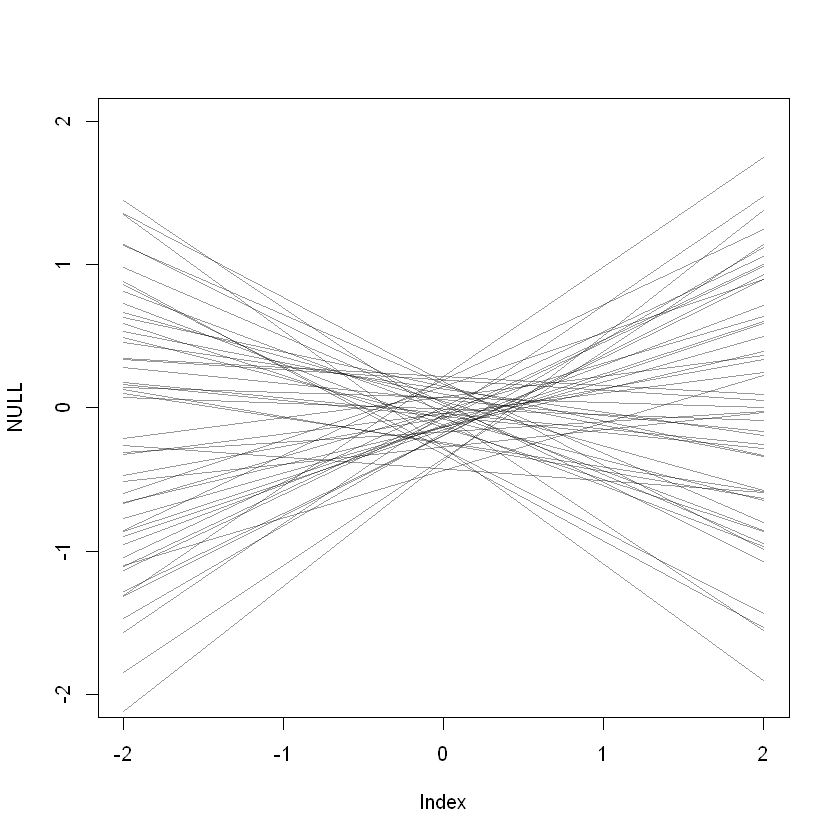

In [12]:
m5.1 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bA * A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
            # dexp() corresponds to the exponential prior 
            # we assign it, which is only defined on the positive reals. 
    ) , data = d )

## R code 5.4
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

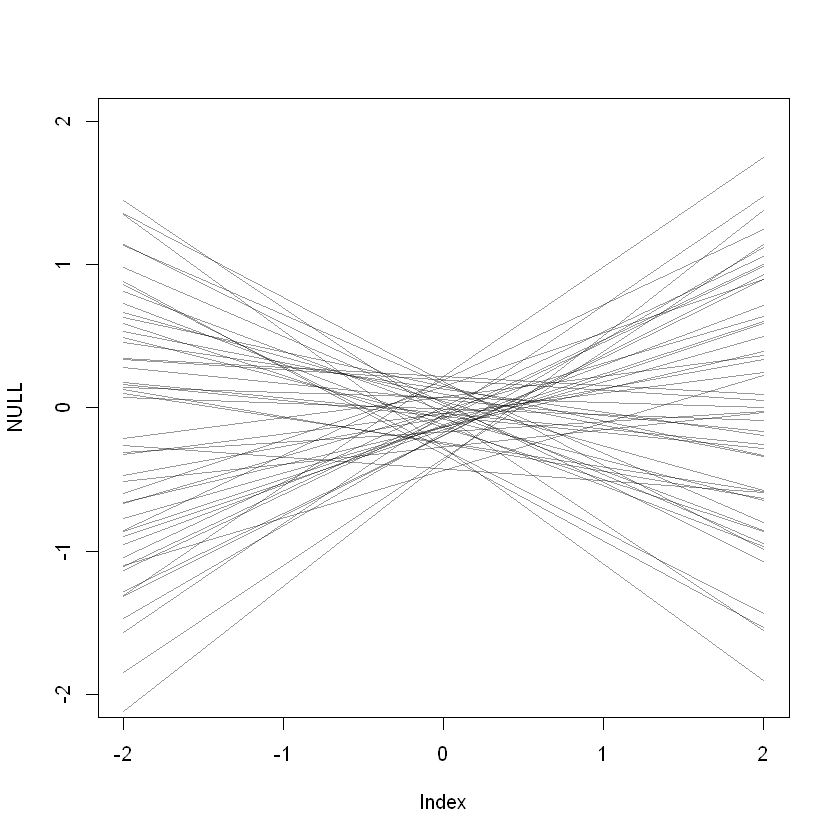

In [14]:
m5.1 <- quap( 
    alist( 
        D ~ dnorm( mu , sigma ) , 
        mu <- a + bA * A , 
        a ~ dnorm( 0 , 0.2 ) , 
        bA ~ dnorm( 0 , 0.5 ) , 
        sigma ~ dexp( 1 ) 
            # dexp() corresponds to the exponential prior  
            # we assign it, which is only defined on the positive reals.  
    ) , data = d ) 
 
## R code 5.4 
set.seed(10) 
prior <- extract.prior( m5.1 ) 
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) ) 
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) ) 
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) ) 


Figure 5.3 displays the result. You may wish to try some vaguer, flatter priors and see how quickly the prior regression lines become ridiculous.

Figure 5.3. shows Plausible regression lines implied by the priors in m5.1. These are weakly informative priors in that they allow some implusibly strong relationships but generally bound the lines to possible ranges of the variables.

Now for the posterior predictions. The procedure is exactly like the examples from the previous chapter: link, then summarize with mean and PI, and then plot.

In [4]:
# compute percentile interval of mean 5.5
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )

mu <- link( m5.1 , data=list(A=A_seq) ) 

# What link will do is take your quap approximation, sample from 
# the posterior distribution, and then compute µ for each case in
# the data and sample from the posterior distribution.

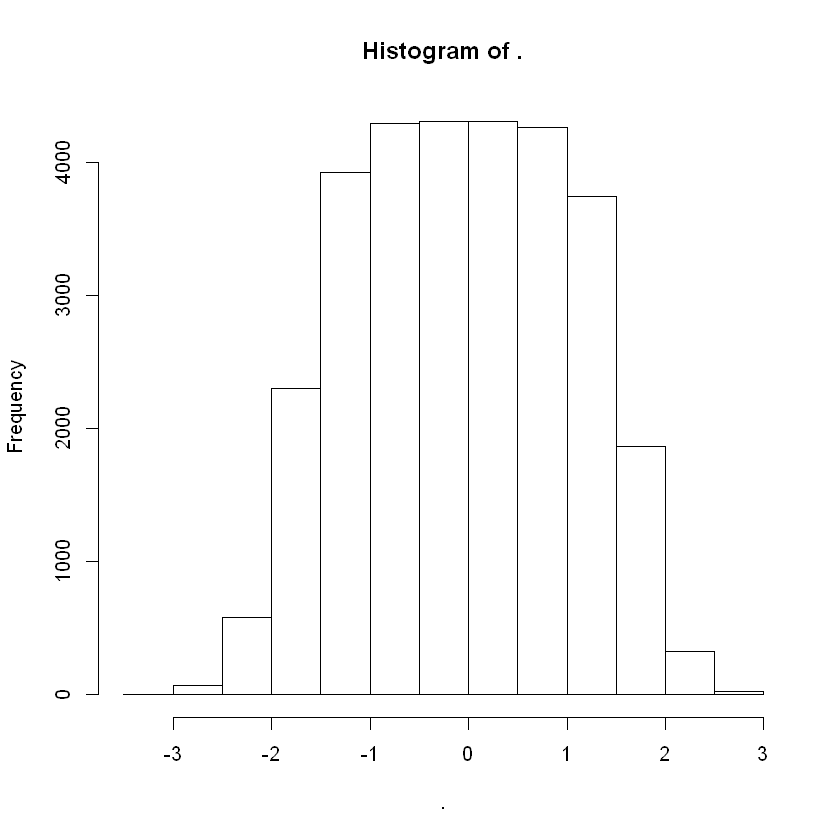

In [5]:
mu %>% hist()

In [6]:
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

mu.mean  %>% head()
mu.PI  %>% head()

[1] 1.700770 1.579485 1.458200 1.336915 1.215630 1.094344

5%,1.150502,1.062653,0.9825223,0.8958785,0.8065835,0.7198966,0.6361626,0.5422833,0.451196,0.3628087,...,-1.0134922,-1.1711349,-1.3272338,-1.4842423,-1.6437156,-1.8068103,-1.9686189,-2.132097,-2.291171,-2.444545
94%,2.271807,2.114886,1.9633001,1.7994372,1.6464540,1.4838786,1.3259953,1.1682217,1.011190,0.8583059,...,-0.4574627,-0.5443261,-0.6339305,-0.7181423,-0.8013672,-0.8819048,-0.9709229,-1.050501,-1.134201,-1.214568


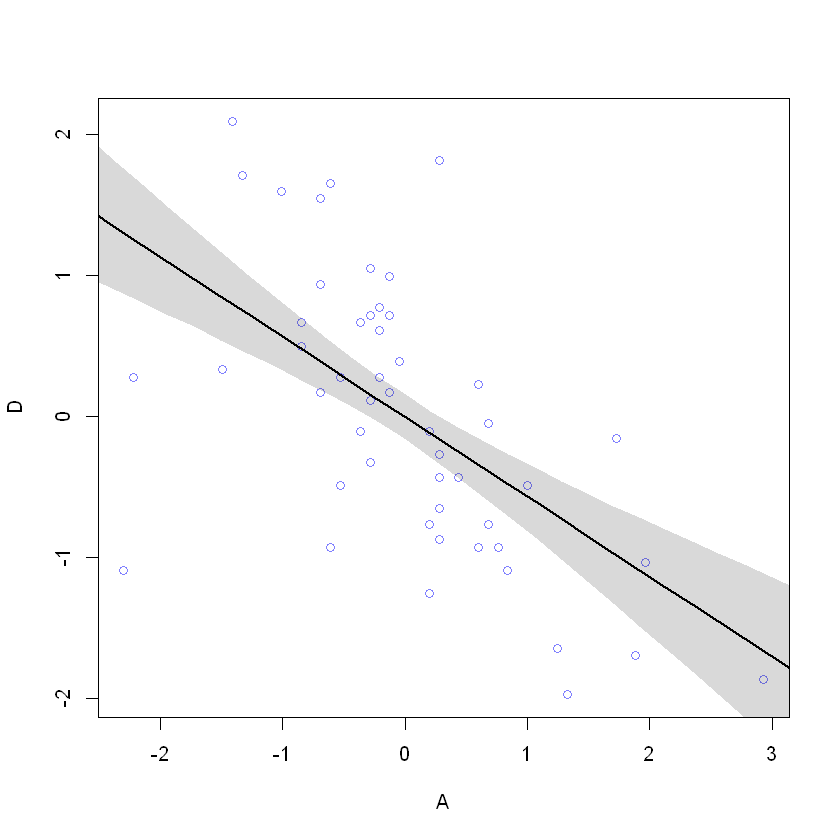

In [7]:
# plot it all
plot( D ~ A , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

In [8]:
m5.1 %>% precis()

,mean,sd,5.5%,94.5%
a,7.672660e-08,0.09737858,-0.1556297,0.1556299
bA,-5.684033e-01,0.10999954,-0.7442038,-0.3926028
sigma,7.883237e-01,0.07801084,0.6636473,0.9130001


If you inspect the precis output, you’ll see that posterior for βA is reliably negative, as seen in Figure 5.2.

You can fit a similar regression for the relationship in the left-hand plot:

###### **<font color = 'purple' style='background-color: lightyellow'>M5.2</font>**

In [9]:
# data(WaffleDivorce)
# d <- WaffleDivorce

## R code 5.6
d$M <- scale( d$Marriage )
# d$A <- scale( d$MedianAgeMarriage )
# d$D <- scale( d$Divorce )

m5.2 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bM * M ,
        a ~ dnorm( 0 , 0.2 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = d )

m5.2 %>% precis()

,mean,sd,5.5%,94.5%
a,2.918047e-07,0.10824642,-0.1729984,0.1729990
bM,3.500540e-01,0.12592744,0.1487977,0.5513104
sigma,9.102653e-01,0.08986239,0.7666479,1.0538828


In [10]:
d %>% head()

Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,A,D,M
Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,-0.6062895,1.6542053,0.02264406
Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,-0.6866993,1.5443643,1.54980162
Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,-0.2042408,0.6107159,0.04897436
Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,-1.4103870,2.0935693,1.65512283
California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,0.5998567,-0.9270579,-0.26698927
Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00,-0.2846505,1.0500799,0.89154405


In [11]:
## R code 5.4
set.seed(10)
prior <- extract.prior( m5.2 ) # Extracts or draw samples from fit models.


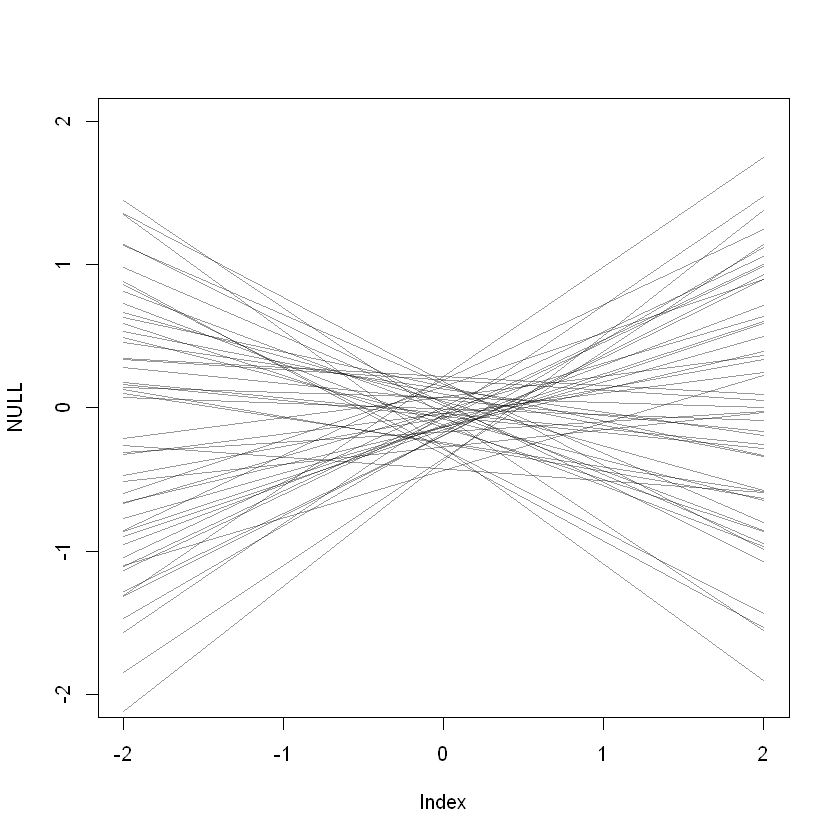

In [12]:
mu <- link( m5.2 , post=prior , data=list( M=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

In [16]:
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

mu.mean  %>% head()
mu.PI  %>% head()

# compute percentile interval of mean 5.5
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )

mu <- link( m5.2 , data=list(M=A_seq) ) 

# What link will do is take your quap approximation, sample from 
# the posterior distribution, and then compute µ for each case in
# the data and sample from the posterior distribution.

[1] -1.0484532 -0.9738256 -0.8991980 -0.8245704 -0.7499428 -0.6753152

5%,-1.7209217,-1.6032297,-1.4821725,-1.3657181,-1.2449880,-1.132746,-1.0103042,-0.8942282,-0.7789259,-0.6681833,...,0.1315071,0.1738677,0.2160273,0.2487848,0.286919,0.3188098,0.3490263,0.3796581,0.4179467,0.4531528
94%,-0.4003118,-0.3716007,-0.3413117,-0.3134551,-0.2812377,-0.244494,-0.2102803,-0.1843421,-0.1462975,-0.1037676,...,0.7587611,0.8721117,0.9916986,1.1109819,1.224606,1.3381747,1.4518536,1.5685912,1.6860424,1.8035886


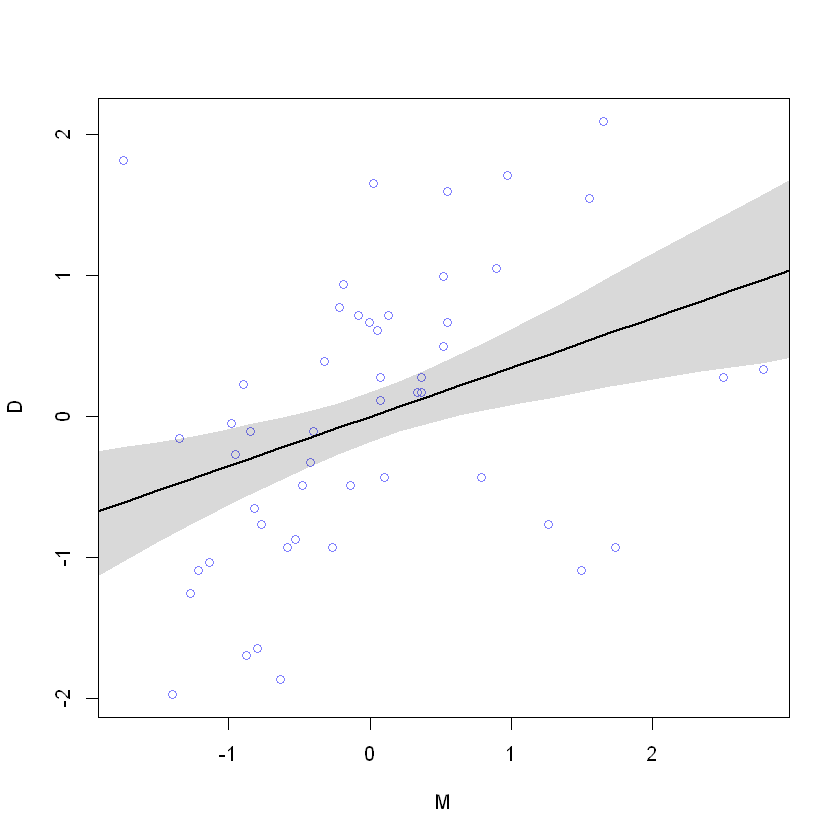

In [17]:
# plot it all
plot( D ~ M , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )


##### 1e

In [20]:
# load data
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize predictor
d$MedianAgeMarriage.s <- (d$MedianAgeMarriage-mean(d$MedianAgeMarriage))/
sd(d$MedianAgeMarriage)

# fit model
m5.1 <- map(
    alist(
        Divorce ~ dnorm( mu , sigma ) ,
        mu <- a + bA * MedianAgeMarriage.s ,
        a ~ dnorm( 10 , 10 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) , data = d )

And the following code will compute the shaded confidence region. The procedure is exactly like the examples from the previous chapter. Then it plots the raw data, draws the posterior mean regression line, and draws the shaded region.

[ 1000 / 1000 ]


Warning message in abline(m5.1):
"only using the first two of 3 regression coefficients"

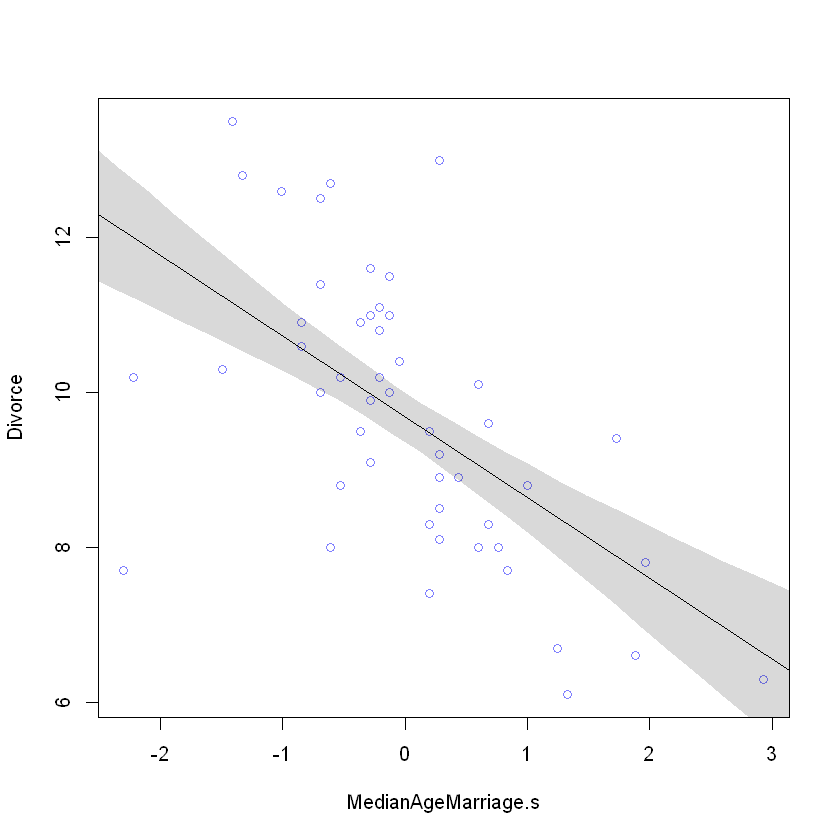

In [21]:
# compute percentile interval of mean
MAM.seq <- seq( from=-3 , to=3.5 , length.out=30 )
mu <- link( m5.1 , data=data.frame(MedianAgeMarriage.s=MAM.seq) )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( Divorce ~ MedianAgeMarriage.s , data=d , col=rangi2 )
abline( m5.1 )
shade( mu.PI , MAM.seq )

### Think before you regress

The pattern we see in the previous two models and illustrated in Figure 5.2 is symptomatic of a situation in which only one of the predictor variables, A in this case, has a causal impact on the outcome, D, even though both predictor variables are strongly associated with the outcome.

To understand this better, it is helpful to introduce a particular type of casual graph known as a DAG, short for directed acyclic graph. Graph means it is nodes and connections. Directed means the connections have arrows that indicate directions of causal influence. And acyclic means that causes do not eventually flow back on themselves. A DAG is a way of describing qualitative causal relationships among variables. It isn’t as detailed as a full model description, but it contains information that a purely statistical model does not. Unlike a statistical model, a DAG, if it is correct, will tell you the consequences of intervening to change a variable.

<img src='pics/SR_h39.png' alt='Drawing' style='width:425pt'/>

It represents a heuristic causal model. Like other models, it is an analytical assumption. The symbols A, M, and D are our observed variables. The arrows show directions of influence. What this DAG says is:

(1) A may directly influence D

(2) M may directly influence D

(3) A may also indirectly influence D through M

In more human terms, age of marriage can influence divorce in two ways. 

* First it can have a direct effect, perhaps because younger people change faster than older people and are therefore more likely to grow incompatible with a partner. 


* Second, it can have an indirect effect by influencing the marriage rate. If people get married earlier, then the marriage rate may rise, because there are more young people. 

    Consider for example if an evil dictator forced everyone to get marriage at age 65. Since a smaller fraction of the population lives to 65 than to 25, forcing delayed marriage will also reduce the marriage rate. If marriage rate itself has any direct effect on divorce, maybe by making marriage more or less normative, then some of that direct effect could be the indirect effect of age at marriage.

To infer the strength of these different arrows, we need more than one model. <font color = 'blue'>Model m5.1, the regression of D on A, tells us only that the total association of age at marriage is strongly negative with divorce rate</font>. 

The “total” here means we have to account for every path from A to D. There are two such paths in this graph: 

1. A → D, a direct path, and 
2. A → M → D, an indirect path. 

In general, it is possible that a variable like A has no direct effect at all on an outcome like D. <font color = 'green'>It could still be associated with D entirely through the indirect path. That type of relationship is known as mediation, and we’ll have an example later.</font>

<font color = 'green'>**In this case however, the indirect path actually does no work**</font>. **<font color = 'purple' style='background-color: lightyellow'>How can we show that?</font>** 

We know from m5.2 that marriage rate is positively associated with divorce rate. But that isn’t enough to tell us that the path M → D is positive. It could be that the association between M and D arises entirely from A’s influence on both M and D. Like this:

<img src='pics/SR_h40.png' alt='Drawing' style='width:225pt'/>

**<font color = 'purple' style='background-color: lightyellow'>This DAG is also consistent with the inferences from models m5.1 and m5.2. So which is it? </font>** 

**<font color = 'purple' style='background-color: lightyellow'>Is there a direct effect of marriage rate, or rather is age at marriage just driving both, creating a spurious correlation between marriage rate and divorce rate?</font>**

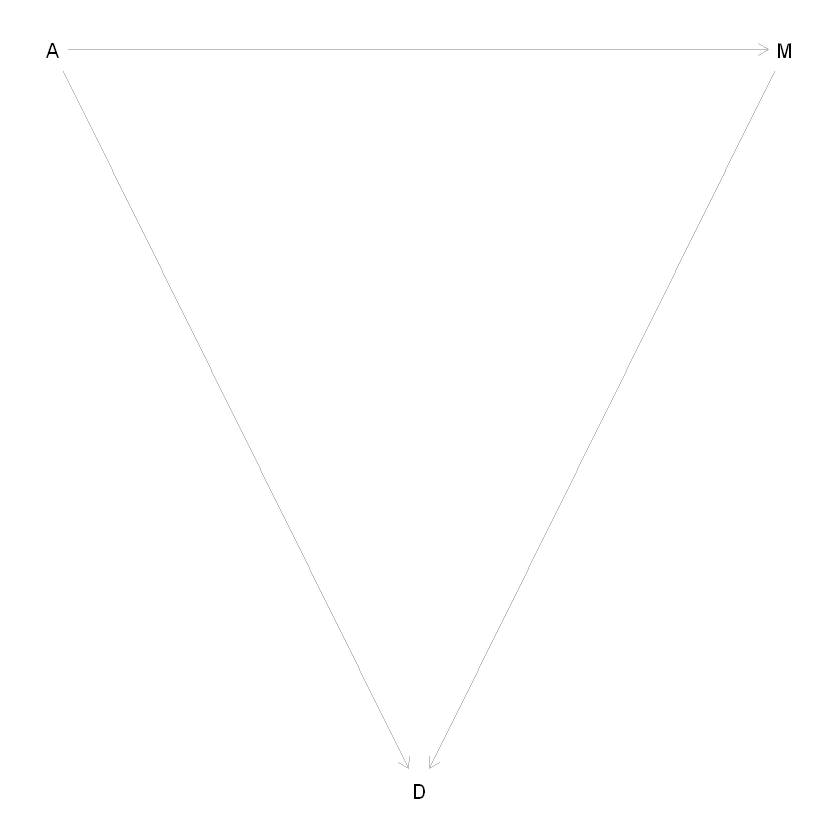

In [4]:
library(dagitty)
dag5.1 <- dagitty( "dag {
    A -> D
    A -> M
    M -> D
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
plot( dag5.1 )

### Multiple regression notation

<img src='pics/SR_i31.png' alt='Drawing' style='width:425pt'/>

<b><font color = 'purple'>So what does it mean to assume $µ_i$ = α + $β_MM_i$ + $β_AA_i$?  </font></b> 

<b><font color = 'blue'>It means that the expected outcome for any State with marriage rate $M_i$ and median age at marriage $A_i$ is the sum of three independent terms </font></b>. 

* The first term is a constant, α. Every State gets this. 

*  The second term is the product of the marriage rate, $M_i$, and the coefficient, $β_M$, that measures the association between marriage rate and divorce rate. 

* The third term is similar, but for the association with median age at marriage instead.

<font color = 'blue'>If you are like most people, this is still pretty mysterious. So it might help to read the + symbols as “or” and then say: A State’s divorce rate can be a function of its marriage rate or its median age at marriage. The “or” indicates independent associations, which may be purely statistical or rather causal.</font>

##### overthinking

<img src='pics/SR_i30.png' alt='Drawing' style='width:425pt'/>

### Approximating the posterior

<img src='pics/SR_i32.png' alt='Drawing' style='width:425pt'/>

And here is the quap code to approximate the posterior distribution:

In [19]:
data(WaffleDivorce)
d <- WaffleDivorce
d$A <- scale( d$MedianAgeMarriage )
d$M <- scale( d$Marriage )
d$D <- scale( d$Divorce )

## R code 5.8
m5.3 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bM*M + bA*A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = d )
precis( m5.3 ) %>% round(2)

,mean,sd,5.5%,94.5%
a,0.00,0.10,-0.16,0.16
bM,-0.07,0.15,-0.31,0.18
bA,-0.61,0.15,-0.85,-0.37
sigma,0.79,0.08,0.66,0.91


The posterior mean for marriage rate, $b_M$, is now close to zero, with plenty of probability of both sides of zero. The posterior mean for age at marriage, $b_A$, is essentially unchanged. It will help to visualize the posterior distributions for all three models, focusing just on the slope parameters $β_A$ and $β_M$:

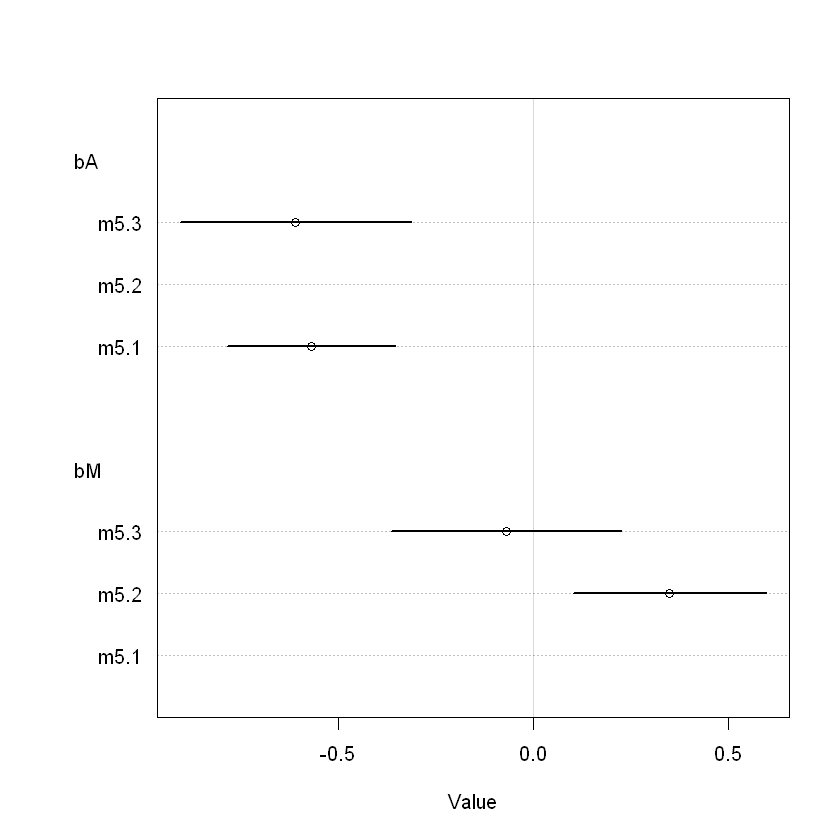

In [20]:
plot( coeftab(m5.1,m5.2,m5.3), par=c("bA","bM") )

The posterior means are shown by the points and the 89% compatibility intervals by the solid horizontal lines. Notice how $b_A$ doesn’t move, only grows a bit more uncertain, while $b_M$ is only associated with divorce when age at marriage is missing from the model. You can interpret these distributions as saying:

><font color = 'green'>**Once we know median age at marriage for a State, there is little or no additional predictive power in also knowing the rate of marriage in that State**</font>.

Note that this does not mean that there is no value in knowing marriage rate. Consistent with the earlier DAG, if you didn’t have access to age-at-marriage data, then you’d definitely find value in knowing the marriage rate. <font color = 'green'>**All of this implies there is no, or almost no, direct causal path from marriage rate to divorce rate. The association between marriage rate and divorce rate is spurious, caused by the influence of age of marriage on both marriage rate and divorce rate**</font>. I’ll leave it to the reader to investigate the relationship between age at marriage, A, and marriage rate, M, to complete the picture.

**<font color = 'purple' style='background-color: lightyellow'>But how did model m5.3 achieve the inference that marriage rate adds no additional information, once we know age at marriage? To answer that question, we’ll draw some pictures.</font>**

In [21]:
## R code 5.10
N <- 50 # number of simulated States
age <- rnorm( N )        # sim A
mar <- rnorm( N , age )  # sim A -> M
div <- rnorm( N , age )  # sim A -> D

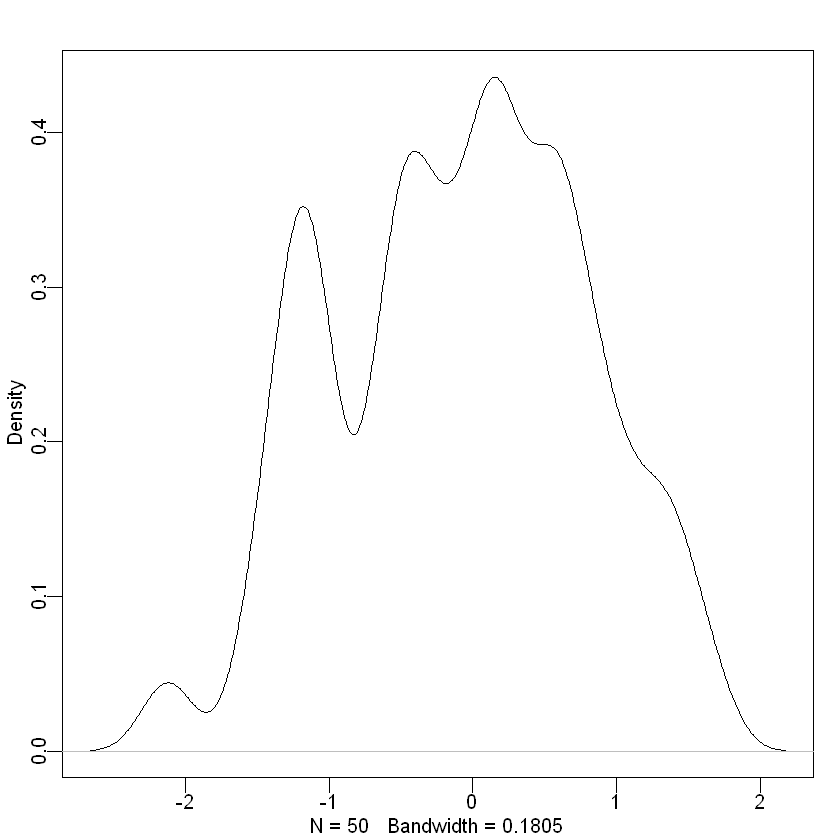

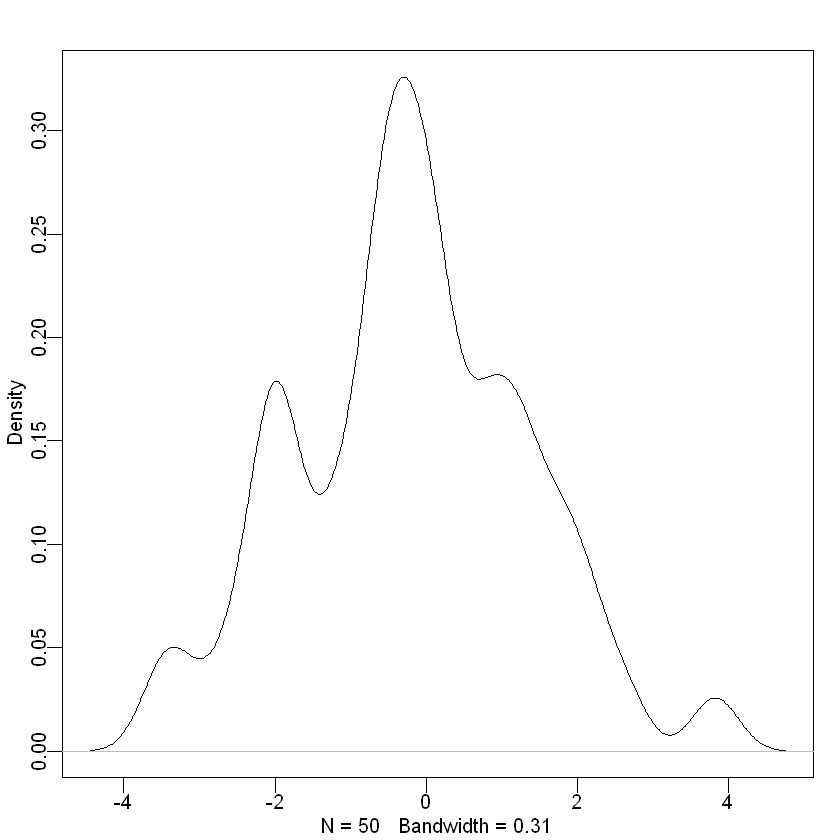

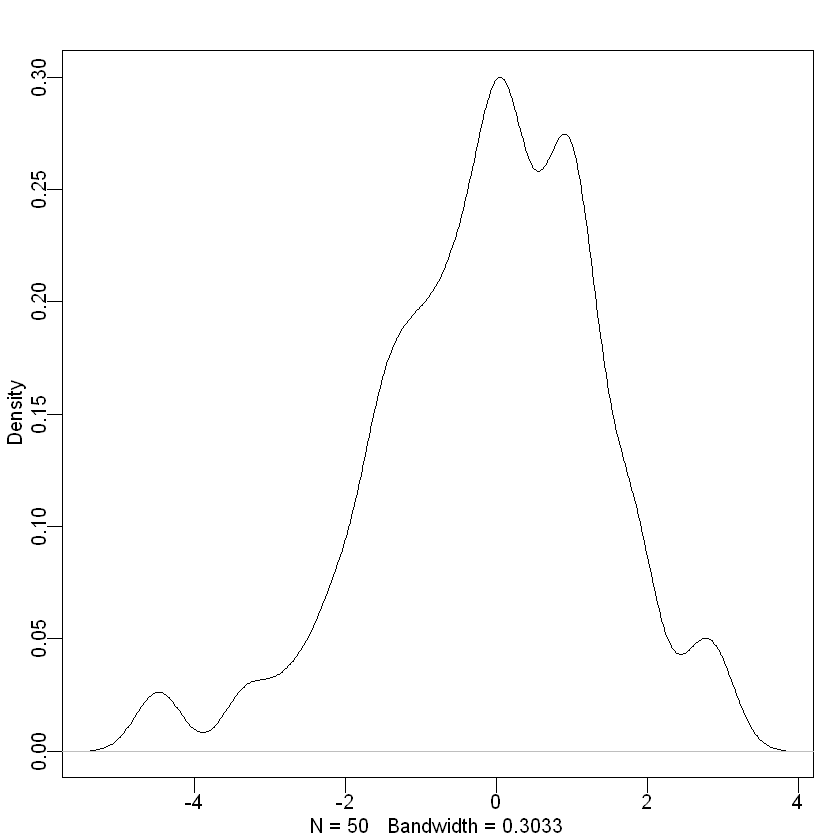

In [22]:
age %>% dens()
mar %>% dens()
div %>% dens()

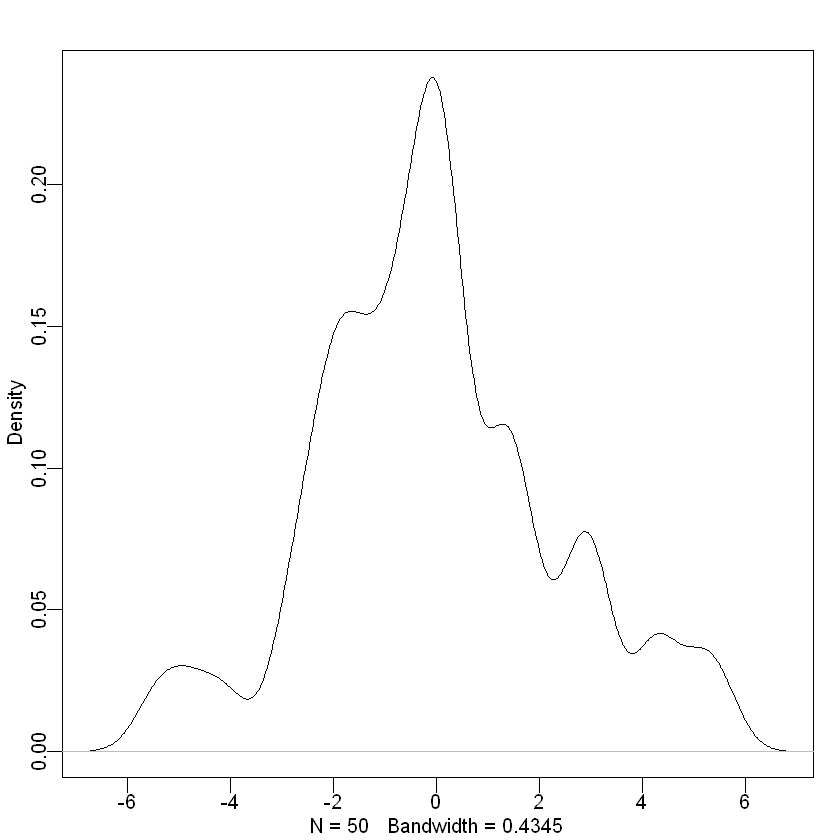

In [23]:
div <- rnorm(N, age + mar )
div %>% dens

### Plotting multivariate posteriors.

Visualizing the posterior distribution in simple bivariate regressions, like those in the previous chapter, is easy. There’s only one predictor variable, so a single scatterplot can convey a lot of information. And so in the previous chapter we used scatters of the data. Then we overlaid regression lines and intervals to both (1) visualize the size of the association between the predictor and outcome and (2) to get a crude sense of the ability of the model to predict the individual observations.



With multivariate regression, you’ll need more plots. There is a huge literature detail-
ing a variety of plotting techniques that all attempt to help one understand multiple linear
regression. None of these techniques is suitable for all jobs, and most do not generalize be-
yond linear regression. So the approach I take here is to instead help you compute whatever
you need from the model. I offer three types of interpretive plots:

(1) **<font color = 'green'>Predictor residual plots</font>**. These plots show the outcome against residual predictor
values.

(2) **<font color = 'green'>Counterfactual plots</font>**. These show the implied predictions for imaginary experiments in which the different predictor variables can be changed independently of one another.


(3) <font color = 'green'>**Posterior prediction plots**</font>. These show model-based predictions against raw data, or otherwise display the error in prediction.

#### Predictor residual plots.

<img src='pics/SR_j48.png' alt='Drawing' style='width:425pt'/>

<img src='pics/SR_k49.png' alt='Drawing' style='width:425pt'/>

A<span style='background-color: lightgreen'> predictor variable residual</span> is <font color = 'green'>the average prediction error when we use all of the other predictor variables to model a predictor of interest</font>. 

That’s a complicated concept, so we’ll go straight to the example, where it will make sense. <font color = 'green'>The benefit of computing these things is that, once plotted against the outcome, we have a bivariate regression of sorts that has already “controlled” for all of the other predictor variables</font>. It just leaves in the variation that is not expected by the model of the mean, µ, as a function of the other predictors. 

In our multivariate model of divorce rate, we have two predictors: 

(1) marriage rate (M) and 

(2) median age at marriage (A). 

To compute predictor residuals for either, we just use the other predictor to model it. So for marriage rate, this is the model we need:

<img src='pics/SR_i33.png' alt='Drawing' style='width:145pt'/>

As before, M is marriage rate and A is median age at marriage. Note that since we standardized both variables, we already expect the mean α to be around zero, as before. So I’m reusing the same priors as earlier. This code will approximate the posterior:

In [24]:
## R code 5.11
m5.4 <- quap(
    alist(
        M ~ dnorm( mu , sigma ) ,
        mu <- a + bAM * A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bAM ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = d )

And then we compute the residuals by subtracting the observed marriage rate in each State from the predicted rate, based upon the model above:

In [25]:
## R code 5.12
mu <- link(m5.4)
mu_mean <- apply( mu , 2 , mean )
mu_resid <- d$M - mu_mean

<font color = 'green'>What link will do is take your map model fit, sample from the posterior distribution, and then compute µ for each case in the data and sample from the posterior distribution.</font>

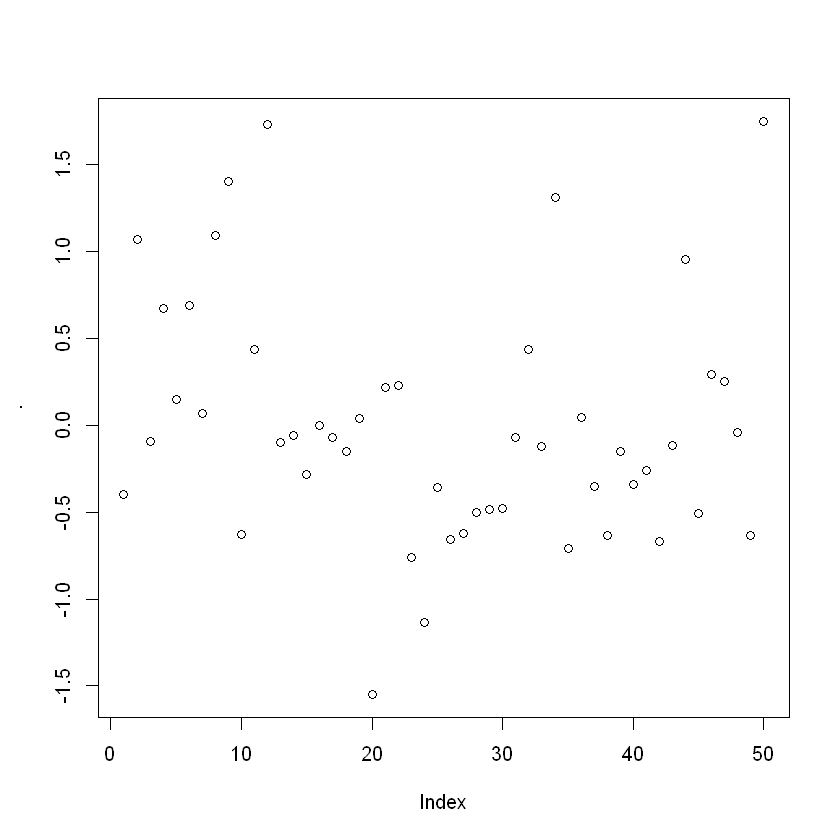

In [26]:
mu_resid %>% plot()

<font color = 'green'>**When a residual is positive, that means that the observed rate was in excess of what the model expects, given the median age at marriage in that State**</font>. 

<font color = 'green'>**When a residual is negative, that means the observed rate was below what the model expects**</font>. In simpler terms, States with positive residuals have high marriage rates for their median age of marriage, while States with negative residuals have low rates for their median age of marriage.

It’ll help to plot the relationship between these two variables, and show the residuals as well. 

**<font color = 'purple' style='background-color: lightyellow'>In Figure 5.4, upper left</font>**, I show m5.4 along with line segments for each residual. <font color = 'red'>Notice that the residuals are variation in marriage rate that is left over, after taking out the purely linear relationship between the two variables</font>.

Now to use these residuals, let’s put them on a horizontal axis and plot them against the actual outcome of interest, divorce rate. 

**<font color = 'purple' style='background-color: lightyellow'>In Figure 5.4  (lower left)</font>**, I plot these residuals against divorce rate, overlaying the linear regression of the two variables. 

* You can think of this plot as displaying the linear relationship between divorce and marriage rates, having statistically “controlled” for median age of marriage. 


* The vertical dashed line indicates marriage rate that exactly matches the expectation from median age at marriage. So <font color = 'blue'>States to the right of the line have higher marriage rates than expected. States to the left of the line have lower rates</font>. 

    <font color = 'blue'>Average divorce rate on both sides of the line is about the same, and so the regression line demonstrates little relationship between divorce and marriage rates</font>.

<img src='pics/SR_i34.png' alt='Drawing' style='width:425pt'/>

<font color = 'blue'>Because there is almost no correlation between divorce rate with mariage rate residuals, we can see that marriage rate doesn't give any addition information about divorce rate over and above the age at marriage.

On the same vein, we see that there's a strongly negative correlation between divorce rate and age of marriage residuals, indicating that age of marriage provides addition information on divorce rate.</font>

<font color = 'red'>So after you already know the  marriage rate there's considerable value in knowing age at marriage but the reverse is not true.</font>

The same procedure works for the other predictor. 

**<font color = 'purple' style='background-color: lightyellow'>The top right plot in Figure 5.4</font>** shows the regression of A on M and the residuals (Age and Mariage rate). 

**<font color = 'purple' style='background-color: lightyellow'>In the lower right</font>**, these residuals are used to predict divorce rate. 
* <font color = 'blue'>States to the right of the vertical dashed line have older-than-expected median age at marriage, while those to the left have younger-than-expected median age at marriage</font>. 


* <font color = 'blue'>Now we find that the average divorce rate on the right is lower than the rate on the left, as indicated by the regression line. States in which people marry older than expected for a given rate of marriage tend to have less divorce</font>.

**<font color = 'purple' style='background-color: lightyellow'>So what’s the point of all of this</font>**? There’s conceptual value in seeing the model-based predictions displayed against the outcome, after subtracting out the influence of other predictors. The plots in Figure 5.4 do this. <font color = 'blue'>But this procedure also brings home the message that regression models measure the remaining association of each predictor with the outcome, after already knowing the other predictors</font>. In computing the predictor residual plots, you had to perform those calculations yourself. In the unified multivariate model, it all happens automatically. Nevertheless, it is useful to keep this fact in mind, because regressions can behave in surprising ways as a result. We’ll have an example soon. 

<font color = 'blue'>Linear regression models do all of this simultaneous measurement with a very specific additive model of how the variables relate to one another</font>. <font color = 'red'>But predictor variables can be related to one another in non-additive ways</font>. The basic logic of statistical control does not change in those cases, but the details definitely do, and these residual plots are not nearly so simple. Luckily there are more general ways to plumb the mysteries of a model. That’s where we turn next.

#### Counterfactual plots

A second sort of inferential plot displays the implied predictions of the model. <font color = 'blue'>I call these plots counterfactual, because they can be produced for any values of the predictor variables you like, even unobserved or impossible combinations like very high median age of marriage and very high marriage rate</font>. <font color = 'blue'>**There are no States with this combination, but in a counterfactual plot, you can ask the model for a prediction for such a State**</font>.

<font color = 'green'>**The simplest use of a counterfactual plot is to see how the predictions change as you change only one predictor at a time**</font>. 
* This means holding the values of all predictors constant, except for a single predictor of interest. Such predictions will not necessarily look like your raw data—they are counterfactual after all—but they will help you understand the implications of the model. 

Since it’s hard to interpret raw numbers in a table, plots that help you understand the model’s implications are priceless. **<font color = 'purple' style='background-color: lightyellow'>Let’s draw a pair of counterfactual plots for the divorce model</font>**. Beginning with a plot showing the impact of changes in M (marriage rate) on predictions:

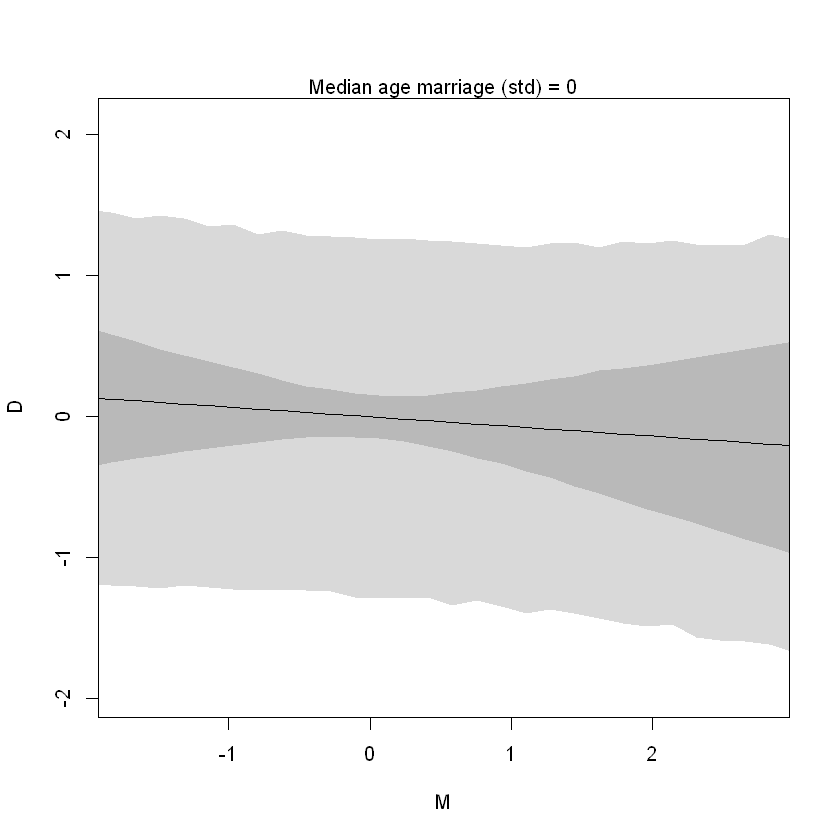

In [40]:

## R code 5.13
# prepare new counterfactual data
M_seq <- seq( from=-2 , to=3 , length.out=30 )
pred_data <- data.frame( M = M_seq , A = 0 )

# compute counterfactual mean divorce (mu)
mu <- link( m5.3 , data=pred_data )
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

# simulate counterfactual divorce outcomes
D_sim <- sim( m5.3 , data=pred_data , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

# display predictions, hiding raw data with type="n"
plot( D ~ M , data=d , type="n" )
mtext( "Median age marriage (std) = 0" )
lines( M_seq , mu_mean )
shade( mu_PI , M_seq )
shade( D_PI , M_seq )


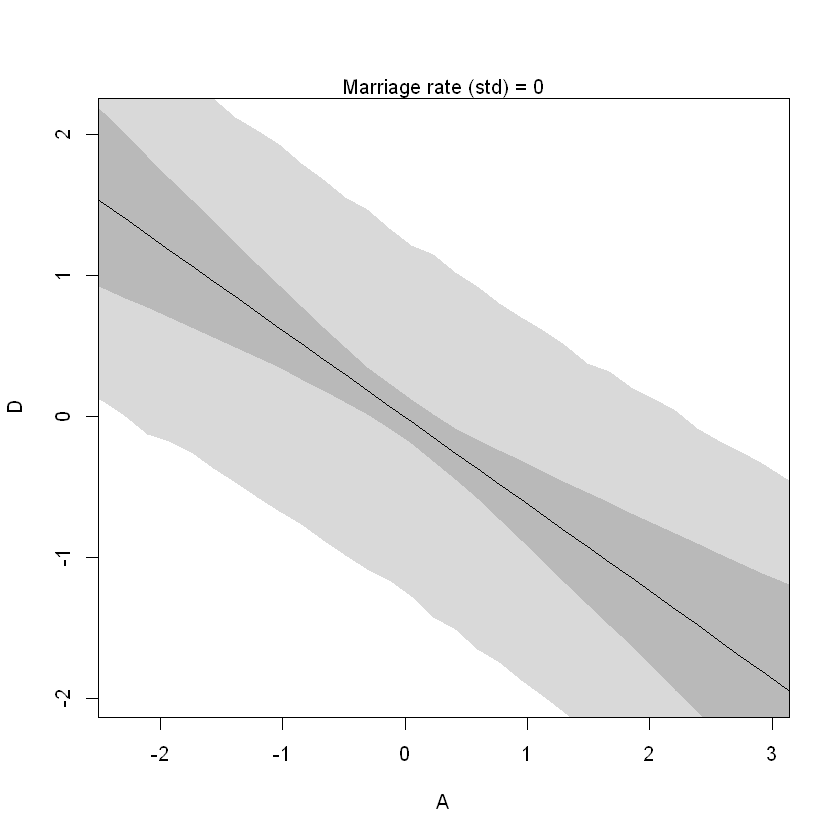

In [43]:

## R code 5.13
# prepare new counterfactual data
A_seq <- seq( from=-3 , to=4 , length.out=40 )
pred_data <- data.frame( M = 0 , A = A_seq )

# compute counterfactual mean divorce (mu)
mu <- link( m5.3 , data=pred_data )
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

# simulate counterfactual divorce outcomes
A_sim <- sim( m5.3 , data=pred_data , n=1e4 )
D_PI <- apply( A_sim , 2 , PI )

# display predictions, hiding raw data with type="n"
plot( D ~ A , data=d , type="n" )
mtext( "Marriage rate (std) = 0" )
lines( A_seq , mu_mean )
shade( mu_PI , A_seq )
shade( D_PI , A_seq )


<img src='pics/SR_j30.png' alt='Drawing' style='width:425pt'/>

The strategy above is to build a new list of data that describe the counterfactual cases we wish to simulate predictions for. 

 * The data frame named `pred_data` holds these cases. 
 
* <font color = 'red'>Note that the observed values are not used</font>. M changes across the range of values in M_seq, while the other predictor is held constant at its mean—which is zero, because A is standardized.

The resulting plot is shown in Figure 5.5 (left side). The plot on the right side of the figure is constructed by the same strategy, but now with M set to its average and A allowed to vary. These plots have the same slopes as the residual plots in the previous section. But they don’t display any data, raw or residual, because they are counterfactual. And they also show percentile intervals on the scale of the data, instead of on that weird residual scale. As a result, they are direct displays of the impact on prediction of a change in each variable.

A tension with such plots, however, lies in their counterfactual nature. In the small world of the model, it is possible to change median age of marriage without also changing the marriage rate. But is this also possible in the large world of reality? Probably not. Suppose for example that you pay young couples to postpone marriage until they are 35 years old. Surely this will also decrease the number of couples who ever get married—some people will die before turning 35, among other reasons—decreasing the overall marriage rate. An extraordinary and evil degree of control over people would be necessary to really hold marriage rate constant while forcing everyone to marry at a later age.

In this example, the difficulty of separately manipulating marriage rate and marriage age doesn’t impede inference much, only because marriage rate has almost no effect on prediction, once median age of marriage is taken into account. But in many problems, including later one in this chapter, more than one predictor variable has a sizable impact on the outcome. In that case, while these counterfactual plots always help in understanding the model, they may also mislead by displaying predictions for impossible combinations of predictor values. If our goal is to intervene in the world, there may not be any realistic way to manipulate each predictor without also manipulating the others. This is serious obstacle to applied science, whether you are an ecologist, an economist, or a marriage counselor.

#### Posterior prediction plots.

**<font color = 'purple' style='background-color: lightyellow'>In addition to understanding the posterior distribution of the parameters, it’s important to check the model’s implied predictions against the observed data</font>**. This is what you did in Chapter 3, when you simulated globe tosses, averaging over the posterior, and comparing the simulated results to the observed. These kinds of checks are useful in many ways. For now, we’ll focus on two uses for them.

<font color = 'green'>**(1) Did the model correctly approximate the posterior distribution?**</font> Golems do make mistakes, as do golem engineers. Errors can be more easily diagnosed by comparing implied predictions to the raw data. Some caution is required, because not all models try to exactly match the sample. But even then, you’ll know what to expect from a successful approximation. You’ll see some examples later (Chapter ??).

<font color = 'green'>**(2) How does the model fail?**</font> All models are useful fictions, so they always fail in some way. Sometimes, the model fits correctly but is still so poor for our purposes that it must be discarded. More often, a model predicts well in some respects, but not in others. By inspecting the individual cases where the model makes poor predictions, you might get an idea of how to improve the model. The difficulty is that this mode is essentially creative and relies upon the analysts domain expertise. It also creates risks of chasing noise in the sample, a topic we’ll focus on in later chapters.

How could we produce a simple posterior predictive check in this case? Let’s begin by simulating predictions, averaging over the posterior.

In [45]:
## R code 5.14
# call link without specifying new data
# so it uses original data
mu <- link( m5.3 )

# summarize samples across cases
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

# simulate observations
# again no new data, so uses original data
D_sim <- sim( m5.3 , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

This code is similar to what you’ve seen before, but now using the original observed data. For multivariate models, there are many different ways to display these simulations. 

The simplest is to just plot predictions against observed. This code will do that, and then add a line to show perfect prediction and line segments for the confidence interval of each prediction:

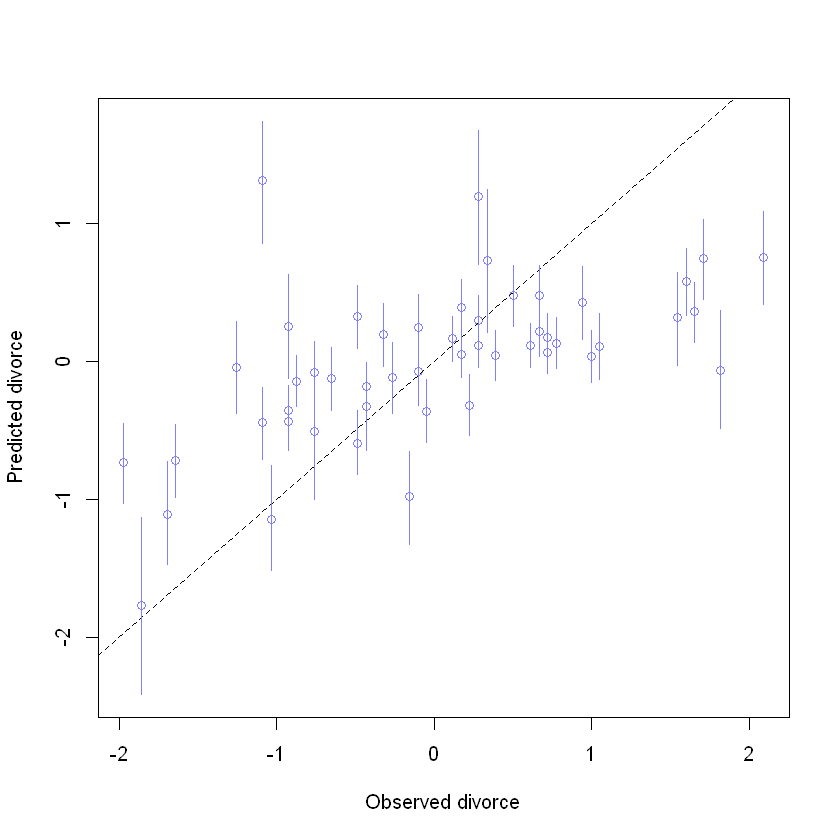

In [51]:
## R code 5.15
plot( mu_mean ~ d$D , col=rangi2 , ylim=range(mu_PI) ,
    xlab="Observed divorce" , ylab="Predicted divorce" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(d) ) lines( rep(d$D[i],2) , mu_PI[,i] , col=rangi2 )

<img src='pics/SR_j32.png' alt='Drawing' style='width:425pt'/>

On horizontal is the  observed divorce rate in each state on  the vertical is the posterior  distribution of a predicted divorce for  each state with the points being the  posterior mean and then the line segments  being the 89% intervals of mean and the  diagonal dashed line is the unity: it's  when they're equal so if there's a state  on the line, the model hits it exactly  right yeah and that's a plug for average state because that's waht regression does. It does really good at averages.

The resulting plot appears in Figure 5.6. <font color = 'blue'>It’s easy to see from this arrangement of the simulations that the model under-predicts for States with very high divorce rates while it overpredicts for States with very low divorce rates</font>. That’s normal. This is what regression does—it is skeptical of extreme values, so it expects regression towards the mean. But beyond this general regression to the mean, some States are very frustrating to the model, lying very far from the diagonal. I’ve labeled some points like this, including Idaho (ID) and Utah (UT), both of which have much lower divorce rates than the model expects them to have. The easiest way to label a few select points is to use identify:

After executing the line of code above, R will wait for you to click near a point in the active plot window. It’ll then place a label near that point, on the side you choose. When you are done labeling points, press your right mouse button (or press esc, on some platforms).

**<font color = 'purple' style='background-color: lightyellow'>What is unusual about Idaho and Utah?</font>** Both of these States have large proportions of members of the Church of Jesus Christ of Latter-day Saints, known sometimes as Mormons. Members of this church have low rates of divorce, wherever they live. <font color = 'blue'>This suggests that having a finer view on the demographic composition of each State, beyond just median age at marriage, would help a lot to refine our understanding</font>.

**Rethinking**: Stats, huh, yeah what is it good for? Often people want statistical modeling to do things that statistical modeling cannot do. For example, we’d like to know whether an effect is “real” or rather spurious. <font color = 'blue'>Unfortunately, modeling merely quantifies uncertainty in the precise way that the model understands the problem.</font> <font color = 'red'>Usually answers to large world questions about truth and causation depend upon information not included in the model</font>. 

<font color = 'purple'>For example</font>, any observed correlation between an outcome and predictor could be eliminated or reversed once another predictor is added to the model. <font color = 'red'>But if we cannot think of another predictor, we might never notice this</font>. Therefore all statistical models are vulnerable to and demand critique, regardless of the precision of their estimates and apparent accuracy of their predictions. Rounds of model criticism and revision embody the real tests of scientific hypotheses, while the statistical procedures often called “tests” are small components of the conversation.

<img src='pics/SR_j33.png' alt='Drawing' style='width:425pt'/>

## Masked relationship

<img src='pics/SR_k50.png' alt='Drawing' style='width:425pt'/>

The divorce rate example demonstrates that multiple predictor variables are useful for knocking out spurious association. <font color = 'blue'>A second reason to use more than one predictor variable is to measure the direct influences of multiple factors on an outcome, when none of those influences is apparent from bivariate relationships</font>. This kind of problem tends to arise when there are two predictor variables that are correlated with one another. However, one of these is positively correlated with the outcome and the other is negatively correlated with it.

You’ll consider this kind of problem in a new data context, information about the composition of milk across primate species, as well as some facts about those species, like body mass and brain size. Milk is a huge investment, being much more expensive than gestation. Such an expensive resource is likely adjusted in subtle ways, depending upon the physiological and development details of each mammal species. Let’s load the data into R first:

In [34]:
library(rethinking)
data(milk)
d <- milk
str(d)

rethinking (Version 1.95)


Attaching package: 'rethinking'


The following object is masked from 'package:purrr':

    map


The following object is masked from 'package:stats':

    rstudent




'data.frame':	29 obs. of  8 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 4 4 4 4 2 2 2 2 2 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 8 9 10 16 2 1 6 28 27 ...
 $ kcal.per.g    : num  0.49 0.51 0.46 0.48 0.6 0.47 0.56 0.89 0.91 0.92 ...
 $ perc.fat      : num  16.6 19.3 14.1 14.9 27.3 ...
 $ perc.protein  : num  15.4 16.9 16.9 13.2 19.5 ...
 $ perc.lactose  : num  68 63.8 69 71.9 53.2 ...
 $ mass          : num  1.95 2.09 2.51 1.62 2.19 5.25 5.37 2.51 0.71 0.68 ...
 $ neocortex.perc: num  55.2 NA NA NA NA ...


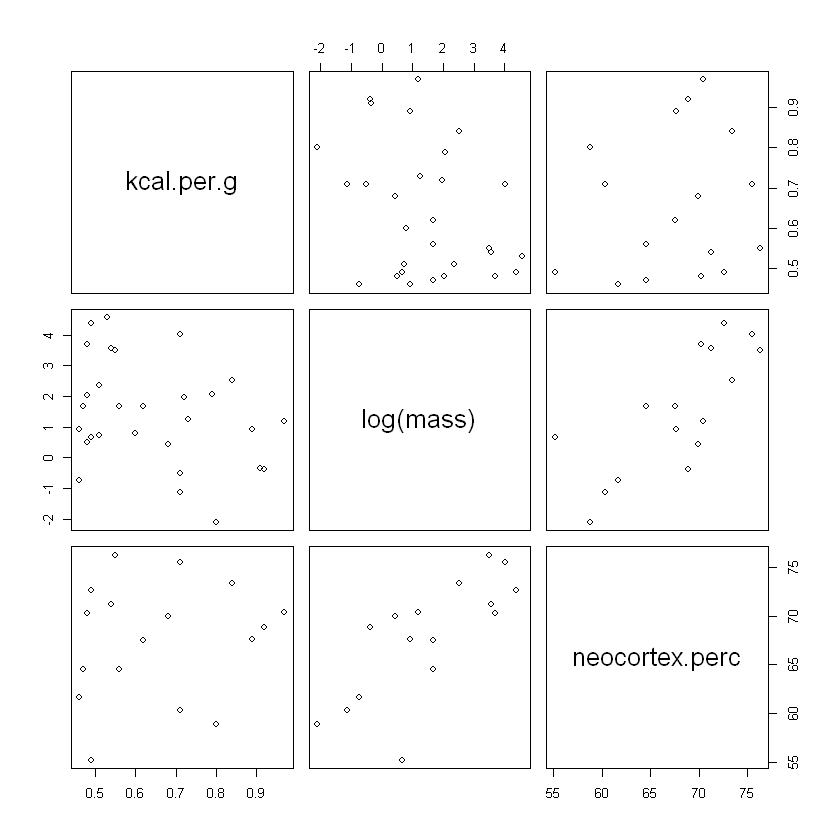

In [35]:
pairs(~kcal.per.g+log(mass)+neocortex.perc, data=d)

**<font color = 'purple' style='background-color: lightyellow'>A popular hypothesis has it that primates with larger brains produce more energetic milk, so that brains can grow quickly.</font>** Answering questions of this sort consumes a lot of effort in evolutionary biology, because there are many subtle statistical issues that arise when comparing species. We’ll start simple, but by the end of the book we’ll include some more of these subtle issues. The variables we’ll consider for now are:

* kcal.per.g : Kilocalories of energy per gram of milk.
* mass : Average female body mass, in kilograms.
* neocortex.perc : The percent of total brain mass that is neocortex mass.


**<font color = 'purple' style='background-color: lightyellow'>The question here is to what extent energy content of milk, measured here by kilocalories, is related to the percent of the brain mass that is neocortex</font>**. 

Neocortex is the gray, outer part of the brain that is particularly elaborated in mammals and especially primates. We’ll end up needing female body mass as well, to see the masking that hides the relationships among the variables. Let’s standardize these three variables. As in previous examples, standardizing helps us both get a reliable approximation of the posterior as well as build reasonable priors.

In [36]:
## R code 5.19
d$K <- scale( d$kcal.per.g )
d$N <- scale( d$neocortex.perc )
d$M <- scale( log(d$mass) )

The first model to consider is the simple bivariate regression between kilocalories and
neocortex percent. You already know how to set up this regression. In mathematical form:

$K_i$ ∼ Normal($µ_i$, σ)

$µ_i$ = α + $β_NN_i$

where K is standardized kilocalories and N is standardized neocortex percent. We still need to consider the priors. But first let’s just try to run this as a quap model with some vague priors, because there is another key modeling issue to address first.



In [37]:
## R code 5.20
m5.5_draft <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bN*N ,
        a ~ dnorm( 0 , 1 ) ,
        bN ~ dnorm( 0 , 1 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )

ERROR: Error in quap(alist(K ~ dnorm(mu, sigma), mu <- a + bN * N, a ~ dnorm(0, : initial value in 'vmmin' is not finite
The start values for the parameters were invalid. This could be caused by missing values (NA) in the data or by start values outside the parameter constraints. If there are no NA values in the data, try using explicit start values.


<img src='pics/SR_j34.png' alt='Drawing' style='width:425pt'/>

In [42]:
## R code 5.21
d$neocortex.perc

[1] 55.16    NA    NA    NA    NA 64.54 64.54 67.64    NA 68.85 58.85 61.69
[13] 60.32    NA    NA 69.97    NA 70.41    NA 73.40    NA 67.53    NA 71.26
[25] 72.60    NA 70.24 76.30 75.49

Each NA in the output is a missing value. If you pass a vector like this to a likelihood function like dnorm, it doesn’t know what to do. After all, what’s the probability of a missing value? Whatever the answer, it isn’t a number, and so dnorm returns a NaN. Unable to even get started, quap (or rather optim, which does the real work) gives up and barks about some weird thing called vmmin not being finite. This kind of opaque error message is unfortunately the norm in R. The additional part of the message suggesting NA values might be responsible is just quap taking a guess.

This is easy to fix. <font color = 'green'>What you need to do here is manually drop all the cases with missing values</font>. More automated black-box commands, like lm and glm, will drop such cases for you. But this isn’t always a good thing, if you aren’t aware of it. In a later chapter (Chapter ??), you’ll see one reason why. Please indulge me for now. It’s worth learning how to do this yourself. To make a new data frame with only complete cases in it, just use:

In [44]:
d %>% drop_na() %>% str

'data.frame':	17 obs. of  11 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 2 2 2 2 2 2 2 3 3 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 2 1 6 27 5 3 4 21 19 ...
 $ kcal.per.g    : num  0.49 0.47 0.56 0.89 0.92 0.8 0.46 0.71 0.68 0.97 ...
 $ perc.fat      : num  16.6 21.2 29.7 53.4 50.6 ...
 $ perc.protein  : num  15.4 23.6 23.5 15.8 22.3 ...
 $ perc.lactose  : num  68 55.2 46.9 30.8 27.1 ...
 $ mass          : num  1.95 5.25 5.37 2.51 0.68 0.12 0.47 0.32 1.55 3.24 ...
 $ neocortex.perc: num  55.2 64.5 64.5 67.6 68.8 ...
 $ K             : num [1:17, 1] -0.94 -1.064 -0.506 1.538 1.724 ...
 $ N             : num [1:17, 1] -2.0802 -0.5086 -0.5086 0.0107 0.2135 ...
 $ M             : num [1:17, 1] -0.456 0.127 0.141 -0.307 -1.076 ...


In [39]:
## R code 5.22
dcc <- d[ complete.cases(d$K,d$N,d$M) , ]

dcc %>% str()

'data.frame':	17 obs. of  11 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 2 2 2 2 2 2 2 3 3 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 2 1 6 27 5 3 4 21 19 ...
 $ kcal.per.g    : num  0.49 0.47 0.56 0.89 0.92 0.8 0.46 0.71 0.68 0.97 ...
 $ perc.fat      : num  16.6 21.2 29.7 53.4 50.6 ...
 $ perc.protein  : num  15.4 23.6 23.5 15.8 22.3 ...
 $ perc.lactose  : num  68 55.2 46.9 30.8 27.1 ...
 $ mass          : num  1.95 5.25 5.37 2.51 0.68 0.12 0.47 0.32 1.55 3.24 ...
 $ neocortex.perc: num  55.2 64.5 64.5 67.6 68.8 ...
 $ K             : num [1:17, 1] -0.94 -1.064 -0.506 1.538 1.724 ...
 $ N             : num [1:17, 1] -2.0802 -0.5086 -0.5086 0.0107 0.2135 ...
 $ M             : num [1:17, 1] -0.456 0.127 0.141 -0.307 -1.076 ...


This makes a new data frame, dcc, that consists of the 17 rows from d that have values in all columns. Now let’s work with the new data frame. All that is new in the code is using dcc instead of d:

In [45]:
## R code 5.23
m5.5_draft <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bN*N ,
        a ~ dnorm( 0 , 1 ) ,
        bN ~ dnorm( 0 , 1 ) ,
        sigma ~ dexp( 1 )
    ) , data=dcc )


Before considering the posterior predictions, let’s consider those priors. As in many simple linear regression problems, these priors are harmless. But are they reasonable? It is important to build reasonable priors, because as the model becomes less simple, the priors can be very helpful, but only if they are scientifically reasonable. To simulate and plot 50 prior regression lines:

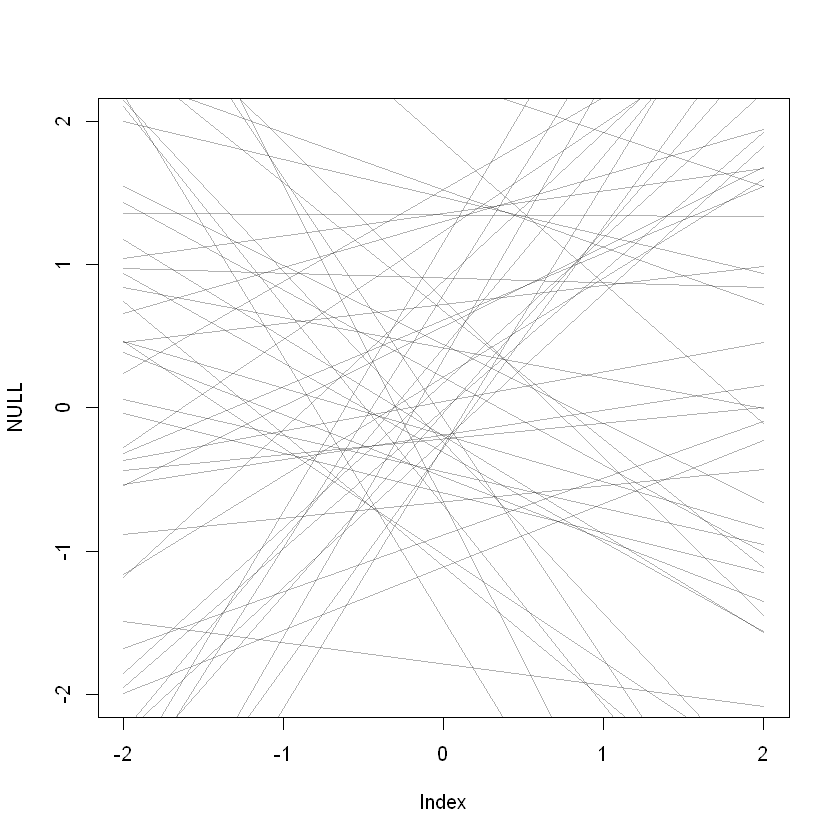

In [46]:
## R code 5.24
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

<img src='pics/SR_j35.png' alt='Drawing' style='width:425pt'/>

On horizontal is the  observed divorce rate in each state on  the vertical is the posterior  distribution of a predicted divorce for  each state with the points being the  posterior me and then the line segments  being the 89% intervals of me and the  diagonal dashed line is the unity it's  when they're equal so if there's a state  on the line the model hits it exactly  right yeah and that's plug for average

The result is displayed on the left side of Figure 5.7. I’ve shown a range of 2 standard deviations for both variables. So that is most of the outcome space. These lines are crazy. <font color = 'green'>**As in previous examples, we can do better by both tightening the α prior so that it sticks closer to zero. With two standardized variables, when predictor is zero, the expected value of the outcome should also be zero**</font>. And the slope βN needs to be a bit tighter as well, so that it doesn’t regularly produce impossibly strong relationships. Here’s an attempt:

In [67]:
## R code 5.25
m5.5 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bN*N ,
        a ~ dnorm( 0 , 0.2 ) ,
        bN ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data=dcc )


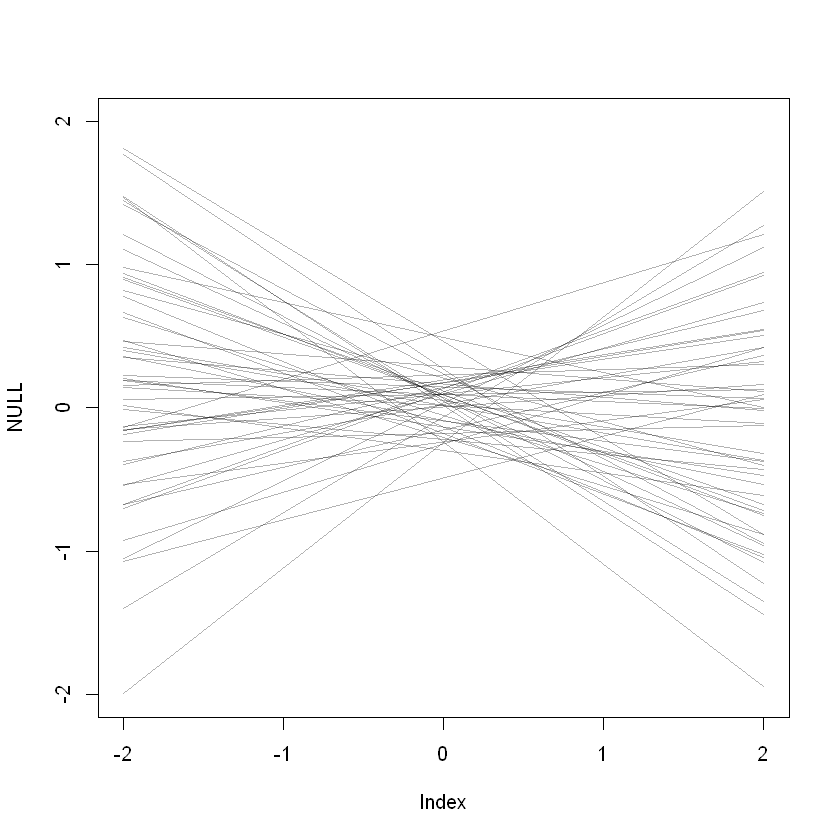

In [68]:
## R code 5.24
prior <- extract.prior( m5.5 )
xseq <- c(-2,2)
mu <- link( m5.5 , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

If you plot these priors, you’ll get what is shown on the right side of Figure 5.7. These are still very vague priors, but at least the lines stay within the high probability region of the observable data. Now let’s look at the posterior:

In [69]:
## R code 5.26
precis( m5.5 )

,mean,sd,5.5%,94.5%
a,0.03993987,0.1544908,-0.2069663,0.2868460
bN,0.13323486,0.2237470,-0.2243560,0.4908257
sigma,0.99982095,0.1647083,0.7365853,1.2630566


From this summary, you can possibly see that this is neither a strong nor very precise association. The standard deviation is almost twice the posterior mean. But as always, it’s much easier to see this if we draw a picture. Tables of numbers are golem speak, and we are not golems. We can plot the predicted mean and 89% compatibility interval for the mean to see this more easily:

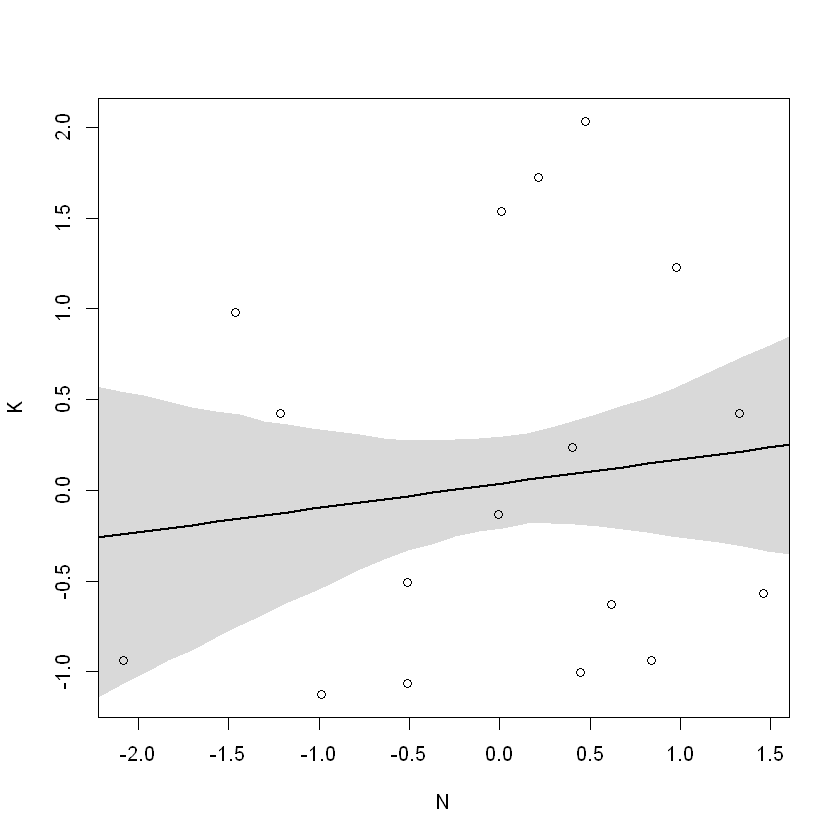

In [70]:
## R code 5.27
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

I display this plot in the upper-left of Figure 5.8. The posterior mean line is weakly positive, but it is highly imprecise. A lot of mildly positive and negative slopes are plausible, given this model and these data.

**<font color = 'purple' style='background-color: lightyellow'>Now consider another predictor variable, adult female body mass</font>**, mass in the data frame. 

* Let’s use the logarithm of mass, log(mass), as a predictor as well. **<font color = 'purple' style='background-color: lightyellow'>Why the logarithm of mass instead of the raw mass in kilograms</font>**? It is often true that scaling measurements like body mass are related by magnitudes to other variables. <font color = 'green'>Taking the log of a measure translates the measure into magnitudes. So by using the logarithm of body mass here, we’re saying that we suspect that the magnitude of a mother’s body mass is related to milk energy, in a linear fashion</font>. 

Now we construct a similar model, but consider the bivariate relationship between kilocalories and body mass:

<img src='pics/SR_k51.png' alt='Drawing' style='width:425pt'/>

<img src='pics/SR_j37.png' alt='Drawing' style='width:425pt'/>

In [73]:
## R code 5.28
m5.6 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bM*M ,
        a ~ dnorm( 0 , 0.2 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data=dcc )
precis(m5.6) %>% round(2)

,mean,sd,5.5%,94.5%
a,0.05,0.15,-0.20,0.29
bM,-0.28,0.19,-0.59,0.03
sigma,0.95,0.16,0.70,1.20


<font color = 'green'>**Log-mass is negatively correlated with kilocalories**</font>. <font color = 'blue'>This influence does seem stronger than that of neocortex percent, although in the opposite direction. It is quite uncertain though, with a wide confidence interval that is consistent with a wide range of both weak and stronger relationships</font>. This regression is shown in the upper-right of Figure 5.8. You should modify the code that plotted the upper-left plot in the same figure, to be sure you understand how to do this.

<img src='pics/SR_j38.png' alt='Drawing' style='width:425pt'/>

In [76]:
## R code 5.29
m5.7 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bN*N + bM*M ,
        a ~ dnorm( 0 , 0.2 ) ,
        bN ~ dnorm( 0 , 0.5 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data=dcc )
precis(m5.7) %>% round(2)

,mean,sd,5.5%,94.5%
a,0.07,0.13,-0.15,0.28
bN,0.68,0.25,0.28,1.07
bM,-0.70,0.22,-1.06,-0.35
sigma,0.74,0.13,0.53,0.95


By incorporating both predictor variables in the regression, the posterior association of both with the outcome has increased. Visually comparing this posterior to those of the previous two models helps:

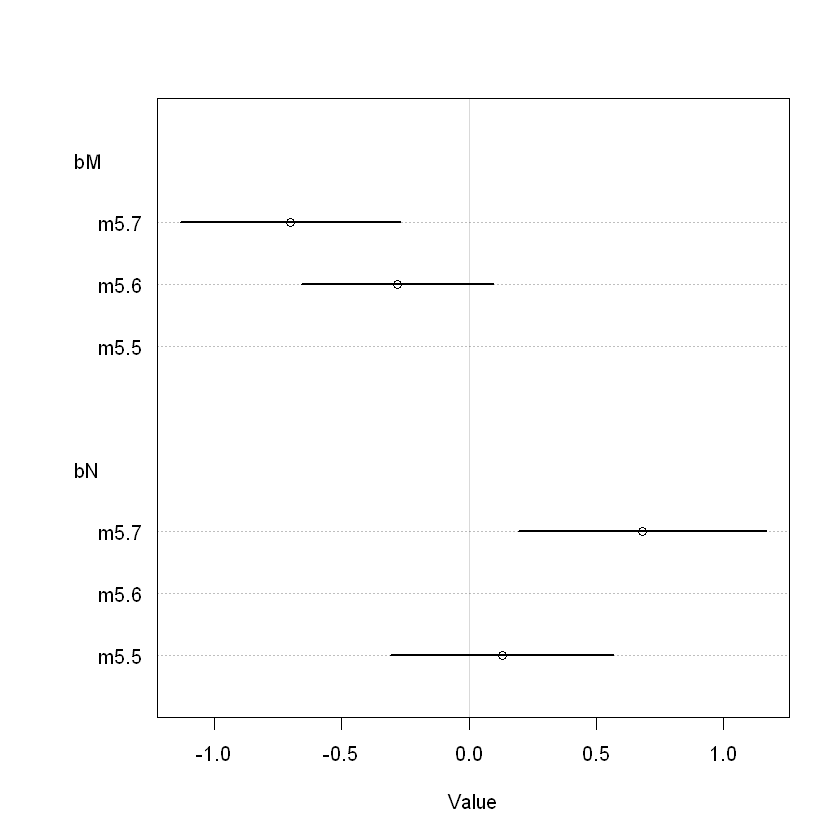

In [78]:
## R code 5.30
plot( coeftab( m5.5 , m5.6 , m5.7 ) , pars=c("bM","bN") )

<font color = 'blue'>The posterior mean for the association of neocortex percent has increased fivefold, and its 89% interval is now entirely above zero. The posterior mean for log body mass has increased 2.5 times in magnitude</font>.

W**<font color = 'purple' style='background-color: lightyellow'>hat happened here? Why did adding neocortex and body mass to the same model lead to larger estimated effects of both?</font>** 

* This is a context in which there are two variables correlated with the outcome, but one is positively correlated with it and the other is negatively correlated with it. 

In addition, both of the explanatory variables are positively correlated with one another. Try a simple pairs plot to appreciate this correlation: `pairs( ~K + M + N , dcc )`. As a result, they tend to cancel one another out.

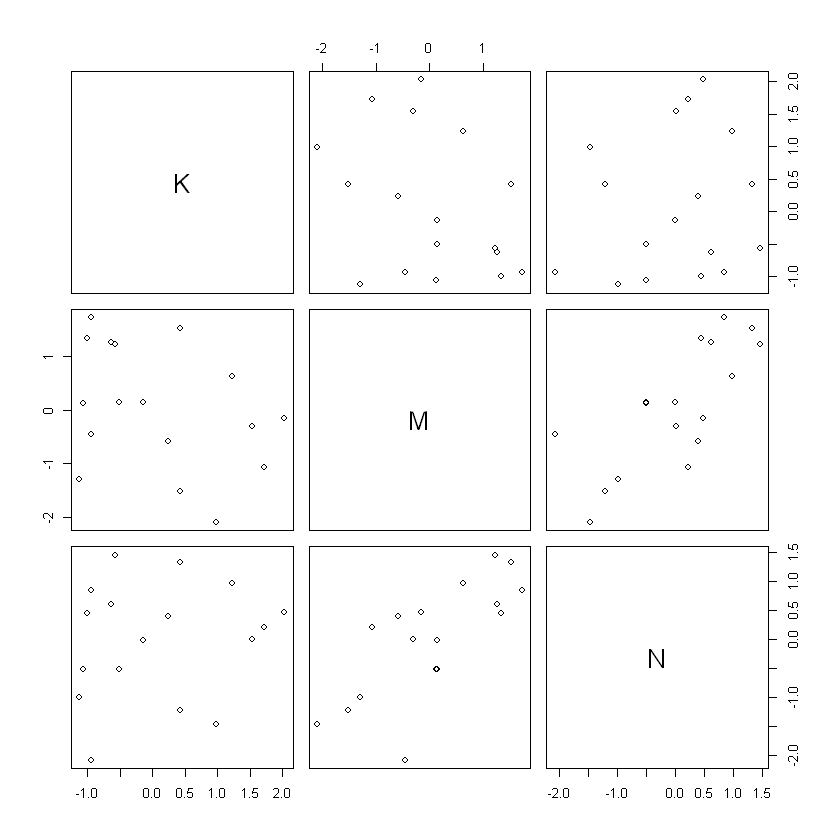

In [79]:
pairs( ~K + M + N , dcc )

This is another case in which multiple regression automatically finds the most revealing cases and uses them to produce inferences. <font color = 'green'>**What the regression model does is ask if species that have high neocortex percent for their body mass have higher milk energy. Likewise, the model asks if species with high body mass for their neocortex percent have higher milk energy**</font>. Bigger species, like apes, have milk with less energy. But species with more neocortex tend to have richer milk. The fact that these two variables, body size and neocortex, are correlated across species makes it hard to see these relationships, unless we statistically account for both.

Some DAGs will help. There are at least three graphs consistent with the pattern in these data. Here they are, and then I’ll explain each.

<img src='pics/SR_j39.png' alt='Drawing' style='width:425pt'/>

* Beginning on the left, the first possibility is that body mass (M) influences neocortex percent (N). Both then influence kilocalories in milk (K). 

* Second, in the middle, neocortex could instead influence body mass. The two variables still end up correlated in the sample. 

* Finally, on the right, there could be an unobserved variable U that influences both M and N, producing a correlation between them.

**<font color = 'purple' style='background-color: lightyellow'>Which of these graphs is right? We don’t know</font>**. In the Overthinking box further down, <font color = 'red'>I’ll show you how to simulate observations consistent with each of these DAGs and show that each can produce the masking phenomenon</font>. <font color = 'red'>**But these graphs are very different causally. Which graph is correct implies different stories both about how the data arise and how changing one variable would influence others**</font>. <span style='background-color: pink'>Even though the data can’t tell you which graph is correct, the graph still matters</span>.

The final thing we’d like to do with these models is to finish Figure 5.8. Let’s make counterfactual plots to show how the model sees the problem. Once we have multiple predictor variables, we can conduct counterfactual experiments that vary one predictor while holding the others constant. In the real world, such experiments are typically impossible. If we change an animal’s body size, natural selection will then change the other features to match it. But these counterfactual plots do help us see how the model views the association between each predictor and the outcome. Here is the code to produce the lower-left plot in Figure 5.8 (page 145).

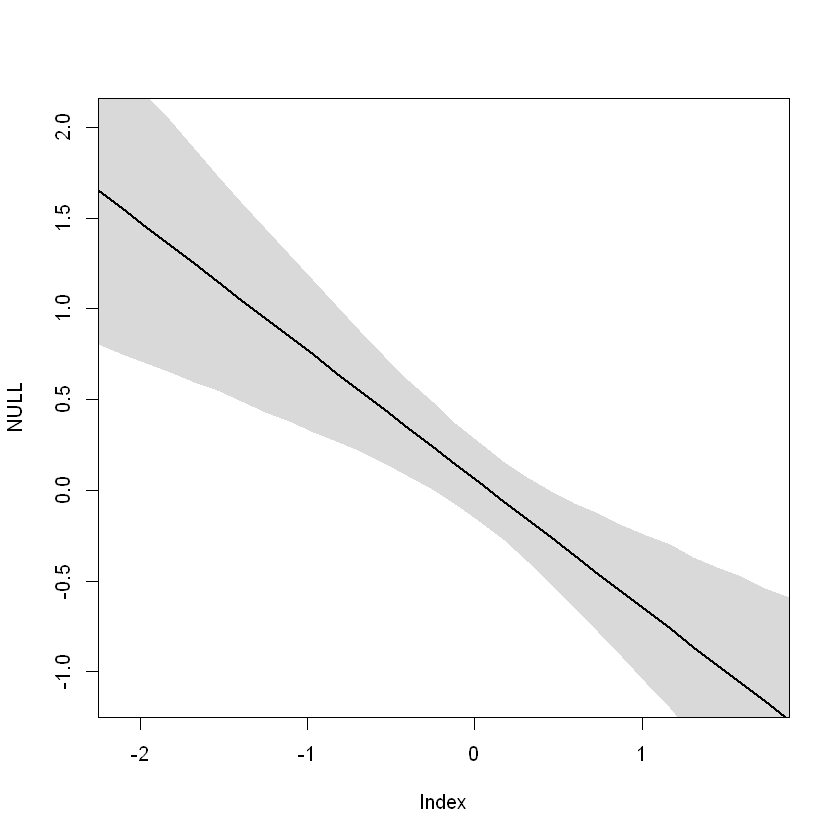

In [80]:
## R code 5.31
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=xseq , N=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$M) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

The reader should try to reproduce the lower-left plot by appropriately modifying this.

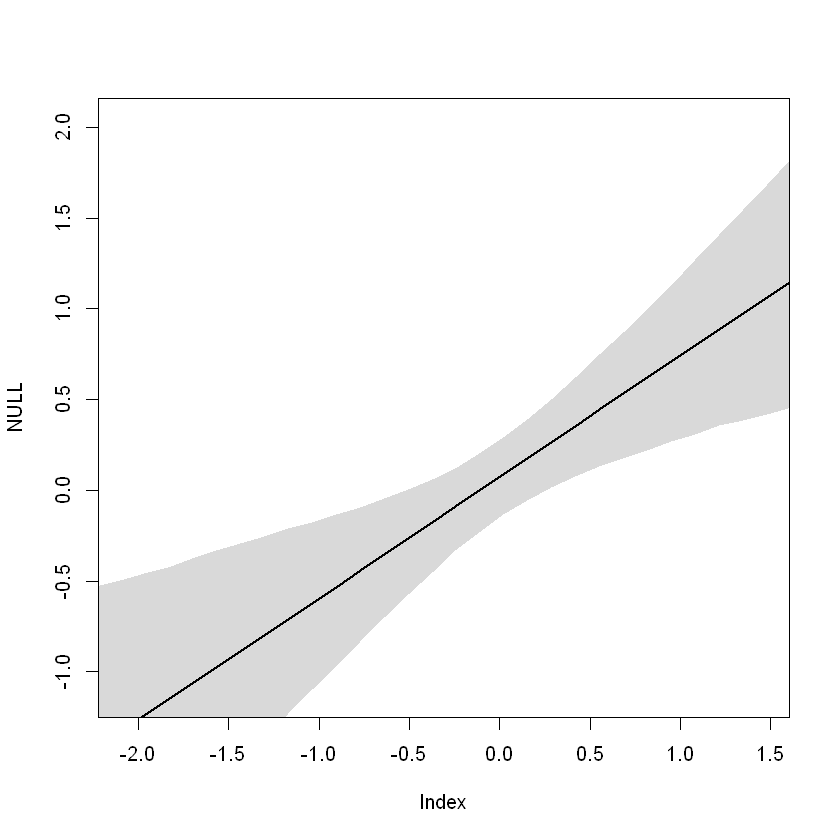

In [82]:
## lower-right plot reproduction
## R code 5.31
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=0 , N=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$N) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

**Overthinking**: Simulating a masking relationship. Just as with understanding spurious association (page 140), it may help to simulate data in which two meaningful predictors act to mask one another. In the previous section, I showed three DAGs consistent with this. To simulate data consistent with the first DAG:

In [86]:
## R code 5.32
# M -> K <- N
# M -> N
n <- 100
M <- rnorm( n )
N <- rnorm( n , M )
K <- rnorm( n , N - M )
d_sim <- data.frame(K=K,N=N,M=M)

You can quickly see the masking pattern of inferences by replacing dcc with d_sim in models m5.5, m5.6, and m5.7. Look at the precis summaries and you’ll see the same masking pattern where the slopes become more extreme in m5.7. The other two DAGs can be simulated like this:

In [ ]:
## R code 5.33
# M -> K <- N
# N -> M
n <- 100
N <- rnorm( n )
M <- rnorm( n , N )
K <- rnorm( n , N - M )
d_sim2 <- data.frame(K=K,N=N,M=M)

In [151]:
# M -> K <- N
# M <- U -> N
n <- 100
U <- rnorm( n )
N <- rnorm( n , U )
M <- rnorm( n , U )
K <- rnorm( n , N - M )
d_sim3 <- data.frame(K=K,N=N,M=M)

d_sim3 %>% head()

K,N,M
-0.01102273,-0.7905115,0.4833477
-0.45632494,-2.0547970,-2.6870261
-0.10865168,1.1128457,0.3159998
1.76919327,4.3015191,1.7318717
-2.69529254,-1.0941859,1.0075958
1.49621086,3.7700650,1.5265998


<img src='pics/SR_k52.png' alt='Drawing' style='width:425pt'/>

## Categorical variables

**<font color = 'purple' style='background-color: lightyellow'>A common question for statistical methods is to what extent an outcome changes as a result of presence or absence of a category.</font>**

A category here means discrete and unordered. For example, consider the different species in the milk energy data again. Some of them are apes, while others are New World monkeys. We might want to ask how predictions should vary when the species is an ape instead of a monkey. Taxonomic group is a categorical variable, because no species can be half-ape and half-monkey (discreteness), and there is no sense in which one is larger or smaller than the other (unordered). Other common examples of categorical variables include:

* Sex: male, female
* Developmental status: infant, juvenile, adult
* Geographic region: Africa, Europe, Melanesia

### Binary categories

In the simplest case, the variable of interest has only two categories, like male and female. Let’s rewind to the Kalahari data you met in Chapter 4. Back then, we ignored sex when predicting height, but obviously we expect males and females to have different averages. Take a look at the variables available:

In [88]:
data(Howell1)
d <- Howell1
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


The male variable is our new predictor, an example of a <span style='background-color: lightgreen'>indicator variable</span>. Indicator variables—sometimes also called “dummy” variables—are devices for encoding unordered categories into quantitative models. 

* There is no sense here in which “male” is one more than “female.” The purpose of the male variable is to indicate when a person in the sample is “male.” So it takes the value 1 whenever the person is male, but it takes the value 0 when the person is female (or any other category). It doesn’t matter which category—“male” or “female”—is indicated by the 1. The model won’t care. But correctly interpreting the model will demand that you remember, so it’s a good idea to name the variable after the category assigned the 1 value.

**<font color = 'purple' style='background-color: lightyellow'>There are two ways to make a model with this information</font>**. 

The first is to use the indicator variable directly inside the linear model, as if it were a typical predictor variable. The effect of an indicator variable is to turn a parameter on for those cases in the category. Simultaneously, the variable turns the same parameter off for those cases in another category. This will make more sense, once you see it in the mathematical definition of the model. Consider again a linear model of height, as in Chapter 4. Now we’ll ignore weight and the other variables and focus only on sex.

<img src='pics/SR_j41.png' alt='Drawing' style='width:425pt'/>

<font color = 'blue'>Using this approach means that $β_m$ represents the expected difference between males and females in height. </font> 

* The parameter α is used to predict both female and male heights. But male height gets an extra $β_m$. <font color = 'blue'>This also means that α is no longer the average height in the sample, but rather just the average female height</font>. This can make assigning sensible priors a little harder. If you don’t have a sense of the expected difference in height—what would be reasonable before seeing the data?—then this approach to including a category can be too much bother.

Furthermore, this approach necessarily assumes there is more uncertainty about one of the categories—“male” in this case—than the other. Why? Because a prediction for a male includes two parameters and therefore two priors. We can simulate this directly from the priors. The prior distributions for µ for females and males are:

In [94]:
mu_female <- rnorm(1e4,178,20)
mu_male <- rnorm(1e4,178,20) + rnorm(1e4,0,10)
precis( data.frame( mu_female , mu_male ) )[,0:4]

,mean,sd,5.5%,94.5%
mu_female,178.2923,20.07991,146.3659,210.3067
mu_male,178.2912,22.28767,142.3183,213.7905


The prior for males is wider, because it uses both parameters. While in a regression this simple, these priors will wash out very quickly, in general we should be careful. <font color = 'green'>We aren’t actually more unsure about male height than female height, a priori.</font> **<font color = 'purple' style='background-color: lightyellow'>Is there another way?</font>**

Another approach available to us, using the same information, is to use an <span style='background-color: lightgreen'>index variable</span> instead. 

* An index variable contains integers that correspond to different categories. The integers are just names, but they also let us reference a list of corresponding parameters, one for each category. In this case, we can construct our index like this:



In [96]:
## R code 5.36
d$sex <- ifelse( d$male==1 , 2 , 1 )
str( d$sex )

 num [1:544] 2 1 1 2 1 2 1 2 1 2 ...


<img src='pics/SR_j42.png' alt='Drawing' style='width:425pt'/>

What this does is create a list of α parameters, one for each unique value in the index variable. So in this case we end up with two α parameters, named $α_1$ and $α_2$. The numbers correspond to the values in the index variable sex. <font color = 'blue'>I know this seems overly complicated, but it solves our problem with the priors. </font> 

* Now the same prior can be assigned to each, corresponding to the notion that all the categories are the same, prior to the data. Neither category has more prior uncertainty than the other. And as you’ll see a bit later, this approach extends really nicely to contexts with more than two categories. 

Let’s approximate the posterior for the above model, the one using an index variable.

In [97]:
## R code 5.37
m5.8 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a[sex] ,
        a[sex] ~ dnorm( 178 , 20 ) ,
        sigma ~ dunif( 0 , 50 )
    ) , data=d )
precis( m5.8 , depth=2 )

,mean,sd,5.5%,94.5%
a[1],134.91024,1.6069263,132.34206,137.4784
a[2],142.57802,1.6974653,139.86514,145.2909
sigma,27.30985,0.8280334,25.98649,28.6332


Note the depth=2 that I added to precis. This tells it to show any vector parameters, like our new a vector. Vector (and matrix) parameters are hidden by precies by default, because sometimes there are lots of these and you don’t want to inspect their individual values. You’ll see what I mean in later chapters.

In [98]:
precis( m5.8 )

2 vector or matrix parameters omitted in display. Use depth=2 to show them.


,mean,sd,5.5%,94.5%
sigma,27.30985,0.8280334,25.98649,28.6332


Interpreting these parameters is easy enough—they are the expected heights in each category. But often we are interested in differences between categories. In this case, what is the expected difference between females and males? We can compute this using samples from the posterior. In fact, I’ll extract posterior samples into a data frame and insert our calculation directly into the same frame:

In [152]:
## R code 5.38
post <- extract.samples(m5.8)
post$diff_fm <- post$a[,1] - post$a[,2] # every sample for alpha 1 - alpha 2
precis( post , depth=2 )[,0:4] %>% round(2)

,mean,sd,5.5%,94.5%
sigma,27.31,0.82,25.99,28.62
a[1],134.90,1.62,132.29,137.42
a[2],142.59,1.69,139.87,145.31
diff_fm,-7.69,2.33,-11.43,-3.99


<font color = 'green'>Our calculation appears at the bottom, as if it were a new parameter in the posterior. This is the expected difference between a female and male in the sample</font>. This kind of calculation is called a <span style='background-color: lightgreen'>contrast</span>. No matter how many categories you have, you can compute the contrast between any two by using samples from the posterior to compute their difference. Then you get the posterior distribution of the difference.

### Many categories. 

Binary categories are easy, whether you use an indicator variable or instead an index variable. But when there are more than two categories, the indicator variable approach explodes. You’ll need a new indicator variable for each new category. If you have k unique categories, you need k − 1 indicator variables. Automated tools like R’s lm do in fact go this route, constructing k − 1 indicator variables for you and returning k − 1 parameter estimates.

<font color = 'blue'>But we’ll instead stick with the index variable approach. It does not change at all when you add more categories</font>. 

* You do get more parameters, of course, just as many as in the indicator variable approach. But the model specification looks just like it does in the binary case. And the priors continue to be easier, unless you really do have prior information about contrasts. 

**<font color = 'purple' style='background-color: lightyellow'>Let’s explore an example using the primate milk data again</font>**. We’re interested now in the clade variable, which encodes the broad taxonomic membership of each species:

In [104]:
## R code 5.39
data(milk)
d <- milk
unique(d$clade)

[1] Strepsirrhine    New World Monkey Old World Monkey Ape             
Levels: Ape New World Monkey Old World Monkey Strepsirrhine

We want an index value for each of these four categories. You could do this by hand, but just coercing the factor to an integer will do the job:

In [105]:
d$clade_id <- as.integer( d$clade )

In [106]:
d %>% str

'data.frame':	29 obs. of  9 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 4 4 4 4 2 2 2 2 2 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 8 9 10 16 2 1 6 28 27 ...
 $ kcal.per.g    : num  0.49 0.51 0.46 0.48 0.6 0.47 0.56 0.89 0.91 0.92 ...
 $ perc.fat      : num  16.6 19.3 14.1 14.9 27.3 ...
 $ perc.protein  : num  15.4 16.9 16.9 13.2 19.5 ...
 $ perc.lactose  : num  68 63.8 69 71.9 53.2 ...
 $ mass          : num  1.95 2.09 2.51 1.62 2.19 5.25 5.37 2.51 0.71 0.68 ...
 $ neocortex.perc: num  55.2 NA NA NA NA ...
 $ clade_id      : int  4 4 4 4 4 2 2 2 2 2 ...


<img src='pics/SR_j43.png' alt='Drawing' style='width:425pt'/>

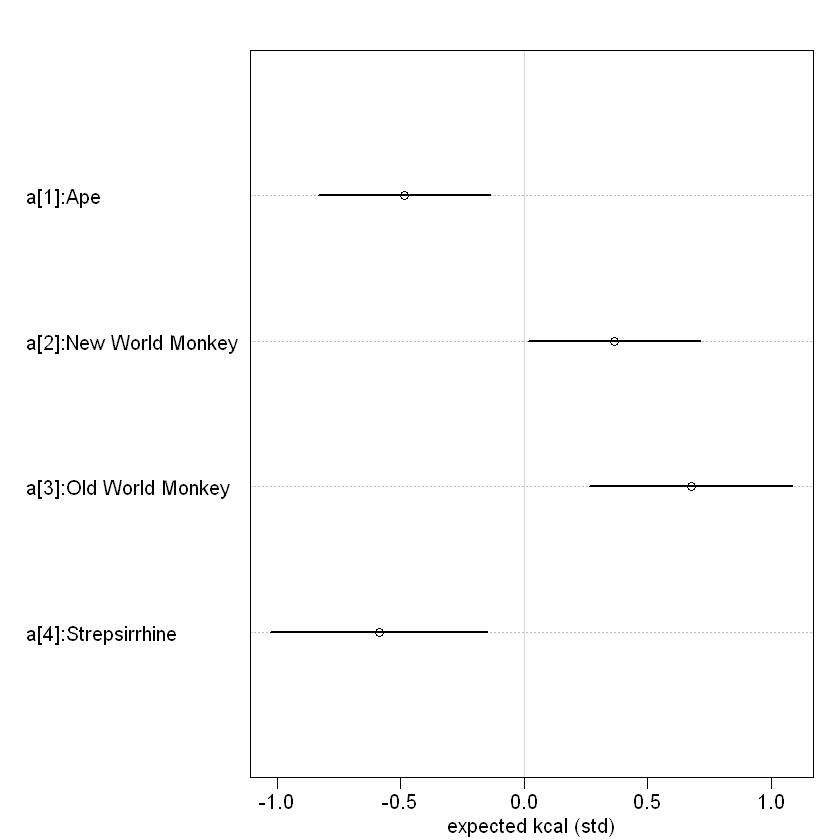

In [107]:
## R code 5.41
d$K <- scale( d$kcal.per.g )
m5.9 <- quap(
    alist(
        K ~ dnorm( mu , sigma ),
        mu <- a[clade_id],
        a[clade_id] ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ) , data=d )
labels <- paste( "a[" , 1:4 , "]:" , levels(d$clade) , sep="" )
plot( precis( m5.9 , depth=2 , pars="a" ) , labels=labels ,
    xlab="expected kcal (std)" )

I used the optional `labels` argument to augment the parameter names `a[1]` through `a[4]` with the clade names from the original variable. In practice, you have to be very careful to keep track of which index values go with which categories. Don’t trust R’s factor variable type to necessarily do things right.

If you have another kind of categorical variable, like diet or habitat, that you’d like to add to the model, the approach is just the same. For example, let’s randomly assign these primates to some made up categories:` [1] Gryffindor, [2] Hufflepuff, [3] Ravenclaw, and [4] Slytherin`.

In [153]:
## R code 5.42
set.seed(63)
d$house <- sample( rep(1:4,each=8) , size=nrow(d) )

Now we can include these categories as another predictor in the model:

In [ ]:
d %>% str

In [ ]:
## R code 5.43
m5.10 <- quap(
    alist(
        K ~ dnorm( mu , sigma ),
        mu <- a[clade_id] + h[house],
        a[clade_id] ~ dnorm( 0 , 0.5 ),
        h[house] ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ) , data=d )

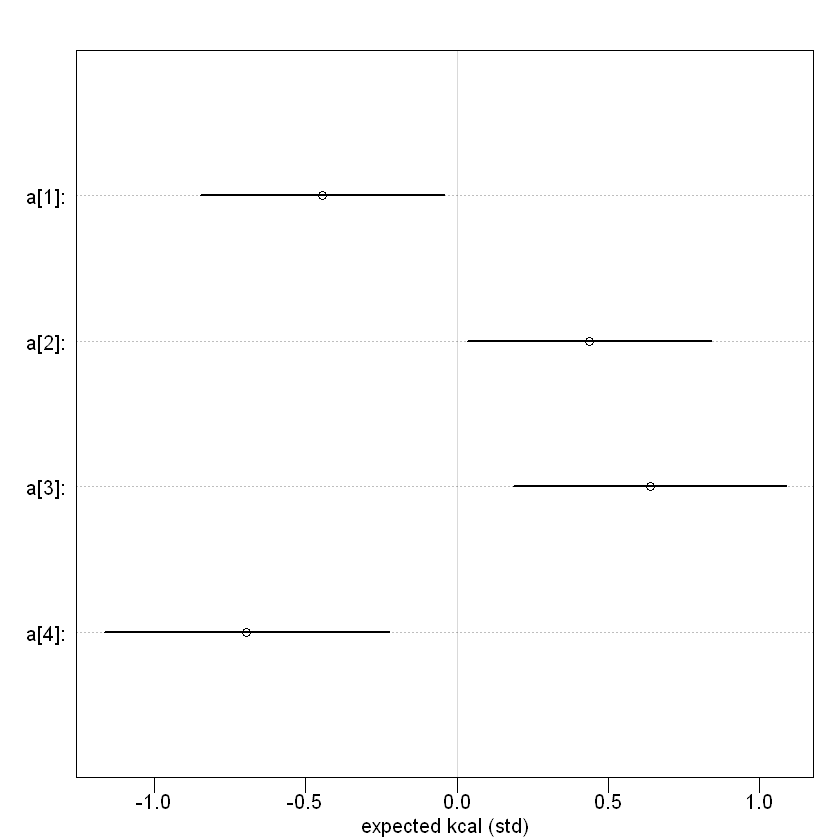

In [154]:
labels <- paste( "a[" , 1:4 , "]:" , levels(d$house) , sep="" )
plot( precis( m5.10 , depth=2 , pars="a" ) , labels=labels ,
    xlab="expected kcal (std)" )

<img src='pics/SR_j46.png' alt='Drawing' style='width:425pt'/>

## Practice

### EASY

##### 5E1. Which of the linear models below are multiple linear regressions?

<img src='pics/SR_k53.png' alt='Drawing' style='width:125pt'/>

(2) & (4)

##### 5E2. Write down a multiple regression to evaluate the claim: Animal diversity is linearly related to latitude, but only after controlling for plant diversity. You just need to write down the model definition.

<img src='pics/SR_k54.png' alt='Drawing' style='width:425pt'/>

##### 5E3. Write down a multiple regression to evaluate the claim: Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree. Write down the model definition and indicate which side of zero each slope parameter should be on.

<img src='pics/SR_k56.png' alt='Drawing' style='width:425pt'/>

##### 5E4

<img src='pics/SR_k57.png' alt='Drawing' style='width:425pt'/>

1, 3, 4, 5

<img src='pics/SR_k58.png' alt='Drawing' style='width:425pt'/>

### MEDIUM

##### 5M1. Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

The are many good answers to this question. The easiest approach is to think of some context that follows the divorce rate pattern in the chapter: one predictor influences both the outcome and the other predictor. For example, we might consider predicting whether or not a scientific study replicates. Two predictor variables are available: (1) sample size and (2) statistical significance. Sample size influences both statistical significance and reliability of a finding. This induces a correlation between significance and successful replication, even though significance is not associated with replication, once sample size is taken into account.

##### 5M2. Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.

Again, many good answers are possible. The pattern from the milk energy example in the chapter is the simplest. Consider for example the influences of income and drug use on health. Income is positively associated, in reality, with health. Drug use is, for the sake of the example, negatively associated with health. But wealthy people consume more drugs than the poor, simply because the wealthy can afford them. So income and drug use are positively associated in the population. If this positive association is strong enough, examining either income or drug use alone will show only a weak relationship with health, because each works on health in opposite directions.

##### 5M3. It is sometimes observed that the best predictor of fire risk is the presence of firefighters— States and localities with many firefighters also have more fires. Presumably firefighters do not cause fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the same reversal of causal inference in the context of the divorce and marriage data. How might a high divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using multiple regression?

Divorce might lead to, or be in expectation of, remarriage. Thus divorce could cause marriage rate to rise. In order to examine this idea, or another like it, the data would need to be structured into more categories, such as remarriage rate versus first marriage rate. Better yet would be longitudinal data. In many real empirical contexts, causation involves feedback loops that can render regression fairly useless, unless some kind of time series framework is used.

##### 5M4. In the divorce data, States with high numbers of Mormons (members of The Church of Jesus Christ of Latter-day Saints, LDS) have much lower divorce rates than the regression models expected. Find a list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate using marriage rate, median age at marriage, and percent LDS population (possibly standardized). You may want to consider transformations of the raw percent LDS variable.

In [155]:
data(WaffleDivorce)
d <- WaffleDivorce
d %>% head()

Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00
Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00


In [157]:
d$pct_LDS <- c(0.75, 4.53, 6.18, 1, 2.01, 2.82, 0.43, 0.55, 0.38,
0.75, 0.82, 5.18, 26.35, 0.44, 0.66, 0.87, 1.25, 0.77, 0.64, 0.81,
0.72, 0.39, 0.44, 0.58, 0.72, 1.14, 4.78, 1.29, 0.61, 0.37, 3.34,
0.41, 0.82, 1.48, 0.52, 1.2, 3.85, 0.4, 0.37, 0.83, 1.27, 0.75,
1.21, 67.97, 0.74, 1.13, 3.99, 0.92, 0.44, 11.5 )

In [159]:
d %>% str

'data.frame':	50 obs. of  14 variables:
 $ Location         : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Loc              : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 9 8 10 ...
 $ Population       : num  4.78 0.71 6.33 2.92 37.25 ...
 $ MedianAgeMarriage: num  25.3 25.2 25.8 24.3 26.8 25.7 27.6 26.6 29.7 26.4 ...
 $ Marriage         : num  20.2 26 20.3 26.4 19.1 23.5 17.1 23.1 17.7 17 ...
 $ Marriage.SE      : num  1.27 2.93 0.98 1.7 0.39 1.24 1.06 2.89 2.53 0.58 ...
 $ Divorce          : num  12.7 12.5 10.8 13.5 8 11.6 6.7 8.9 6.3 8.5 ...
 $ Divorce.SE       : num  0.79 2.05 0.74 1.22 0.24 0.94 0.77 1.39 1.89 0.32 ...
 $ WaffleHouses     : int  128 0 18 41 0 11 0 3 0 133 ...
 $ South            : int  1 0 0 1 0 0 0 0 0 1 ...
 $ Slaves1860       : int  435080 0 0 111115 0 0 0 1798 0 61745 ...
 $ Population1860   : int  964201 0 0 435450 379994 34277 460147 112216 75080 140424 ...
 $ PropSlaves1860   : num  0.45 0 0 0.26 0 0 0 0.016 0 0.44 ...
 $ p

In [163]:
m_5M4 <- map(
    alist(
        Divorce ~ dnorm(mu,sigma),
        mu <- a + bR*Marriage + bA*MedianAgeMarriage + bM*pct_LDS,
        a ~ dnorm(0,100),
        c(bA,bR,bM) ~ dnorm(0,10),
        sigma ~ dunif(0,10)
    ),
    data=d )
    precis( m_5M4 ) %>% round(2)

,mean,sd,5.5%,94.5%
a,38.49,6.93,27.41,49.57
bA,-1.10,0.22,-1.46,-0.74
bR,0.00,0.08,-0.12,0.12
bM,-0.06,0.02,-0.10,-0.03
sigma,1.34,0.13,1.13,1.55


<img src='pics/SR_k59.png' alt='Drawing' style='width:425pt'/>

##### 5M5. One way to reason through multiple causation hypotheses is to imagine detailed mechanisms through which predictor variables may influence outcomes. For example, it is sometimes argued that the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome variable). However, there are at least two important mechanisms by which the price of gas could reduce obesity. First, it could lead to less driving and therefore more exercise. Second, it could lead to less driving, which leads to less eating out, which leads to less consumption of huge restaurant meals. Can you outline one or more multiple regressions that address these two mechanisms? Assume you can have any predictor data you need.

<img src='pics/SR_k61.png' alt='Drawing' style='width:425pt'/>

### HARD

<img src='pics/SR_k60.png' alt='Drawing' style='width:425pt'/>

##### **<font color = 'purple' style='background-color: lightyellow'>5H1. Fit two bivariate Gaussian regressions, using map: </font>**

(1) body weight as a linear function of territory size (area), and 


(2) body weight as a linear function of groupsize. 


Plot the results of these regressions, displaying the MAP regression line and the 95% interval of the mean. **<font color = 'purple' style='background-color: lightyellow'>Is either variable important for predicting fox body weight?</font>**

In [171]:
data(foxes)
d <- foxes
d %>% str()

'data.frame':	116 obs. of  5 variables:
 $ group    : int  1 1 2 2 3 3 4 4 5 5 ...
 $ avgfood  : num  0.37 0.37 0.53 0.53 0.49 0.49 0.45 0.45 0.74 0.74 ...
 $ groupsize: int  2 2 2 2 2 2 2 2 3 3 ...
 $ area     : num  1.09 1.09 2.05 2.05 2.12 2.12 1.29 1.29 3.78 3.78 ...
 $ weight   : num  5.02 2.84 5.33 6.07 5.85 3.25 4.53 4.09 6.13 5.59 ...


In [182]:
d$area %>% summary() %>% round(2)
d$groupsize %>% summary() %>% round(2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.09    2.59    3.13    3.17    3.77    5.07 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00    4.00    4.34    5.00    8.00 

In [174]:
m5H1_1 <- quap(
    alist(
        weight ~ dnorm(mu , sigma) ,
        mu <- a + b_area * area ,
        a ~ dnorm(mean=0 , 100) ,
        b_area ~ dnorm(mean=0 , 10) ,
        sigma ~ dunif(min=0, max=50)
    ) , data = d )

In [177]:
m5H1_2 <- quap(
    alist(
        weight ~ dnorm(mu , sigma) ,
        mu <- a + b_groupsize * groupsize ,
        a ~ dnorm(mean=0 , 100) ,
        b_groupsize ~ dnorm(mean=0 , 10) ,
        sigma ~ dunif(min=0, max=50)
    ) , data = d )

In [179]:
precis(m5H1_1) %>% round(2)
precis(m5H1_2) %>% round(2)

,mean,sd,5.5%,94.5%
a,4.45,0.39,3.83,5.08
b_area,0.02,0.12,-0.16,0.21
sigma,1.18,0.08,1.06,1.30


,mean,sd,5.5%,94.5%
a,5.07,0.32,4.55,5.59
b_groupsize,-0.12,0.07,-0.24,-0.01
sigma,1.16,0.08,1.04,1.29


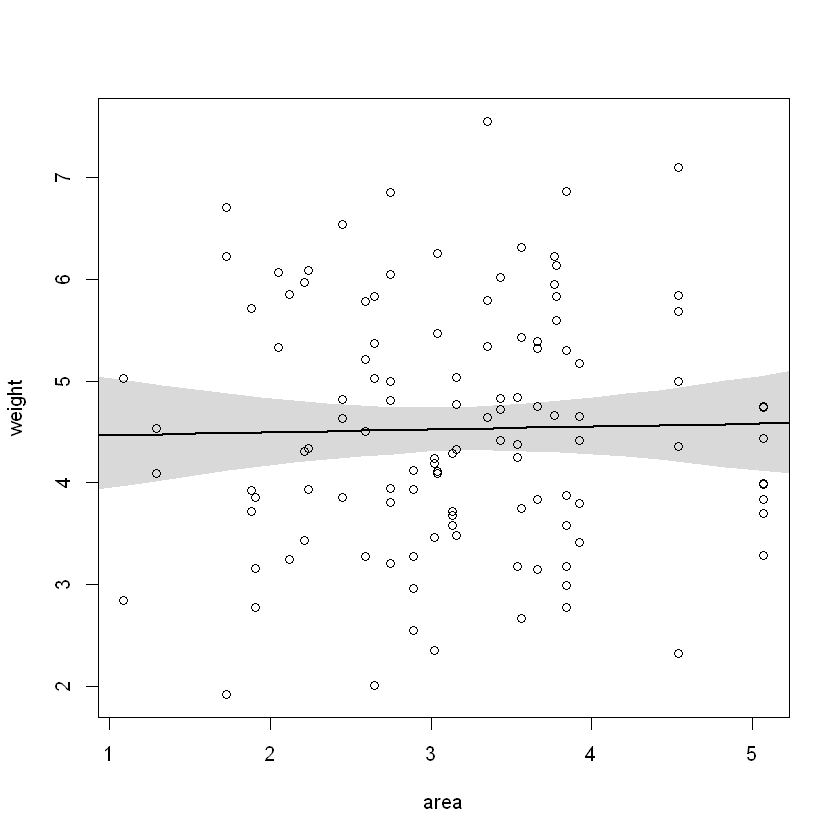

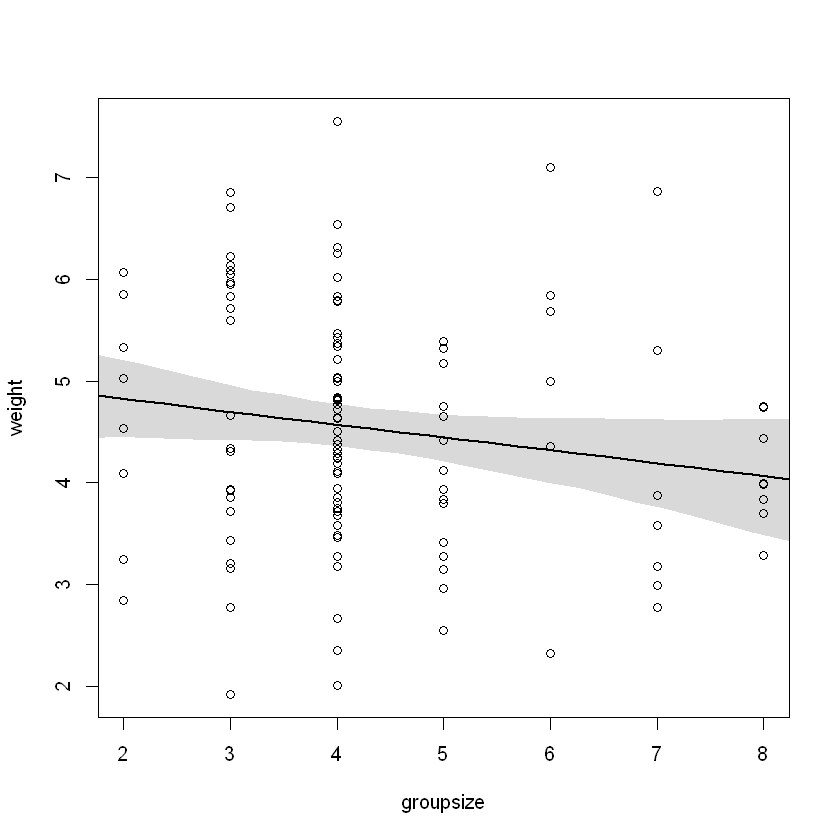

In [202]:
## Plot the results of these regressions, 
# displaying the MAP regression line and the 95% interval of the mean.

xseq <- seq( from=min(d$area)-1 , to=max(d$area)+1 , length.out=30 )
mu <- link( m5H1_1 , data=list(area=xseq) )
mu_mean <- apply(mu, MARGIN = 2, FUN = mean)
mu_PI <- apply(mu, MARGIN = 2, FUN = PI, prob = 0.95)
plot( weight ~ area , data=d )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

## Plot the results of these regressions, 
# displaying the MAP regression line and the 95% interval of the mean.

xseq    <- seq( from=min(d$groupsize)-1 , to=max(d$groupsize)+1 , length.out=30 )
mu      <- link( m5H1_2 , data=list(groupsize=xseq) )
mu_mean <- apply(mu, MARGIN = 2, FUN = mean)
mu_PI   <- apply(mu, MARGIN = 2, FUN = PI, prob = 0.95)
plot( weight ~ groupsize , data=d )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

<font color = 'blue'>So weight on area is essentially a horizontal line—no trend at all of any importance—and the weight on group size effect is on the order of one unit of weight for a change in group size from 2 to 8 animals. That’s a very modest effect, compared to the range of variation in weight within the data as a whole.</font>

##### **<font color = 'purple' style='background-color: lightyellow'>5H2. Now fit a multiple linear regression with weight as the outcome and both area and groupsize as predictor variables. Plot the predictions of the model for each predictor, holding the other predictor constant at its mean. What does this model say about the importance of each variable? Why do you get different results than you got in the exercise just above?</font>**

In [205]:
m5H2 <- quap(
    alist(
        weight ~ dnorm(mu , sigma) ,
        mu <- a + b_area * area + b_groupsize * groupsize ,
        a ~ dnorm(mean=0 , 100) ,
        b_area ~ dnorm(mean=0 , 10) ,
        b_groupsize ~ dnorm(mean=0 , 10) ,
        # c(b_area, b_groupsize) ~ dnorm(mean=0 , 10) # equivalent to above
        sigma ~ dunif(min=0, max=50)
    ) , data = d )

m5H2 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
a,4.45,0.37,3.86,5.04
b_groupsize,-0.43,0.12,-0.63,-0.24
b_area,0.62,0.20,0.30,0.94
sigma,1.12,0.07,1.00,1.24


<font color = 'blue'>From the estimates alone, you can see that the importance of each predictor is increased, now. The MAP is further from zero, and the intervals in both cases are now reliably on one side of zero</font>. 

**<font color = 'purple' style='background-color: lightyellow'>How big are the effects, relative to the range of variation in the data?</font>** Plots will help answer that. 

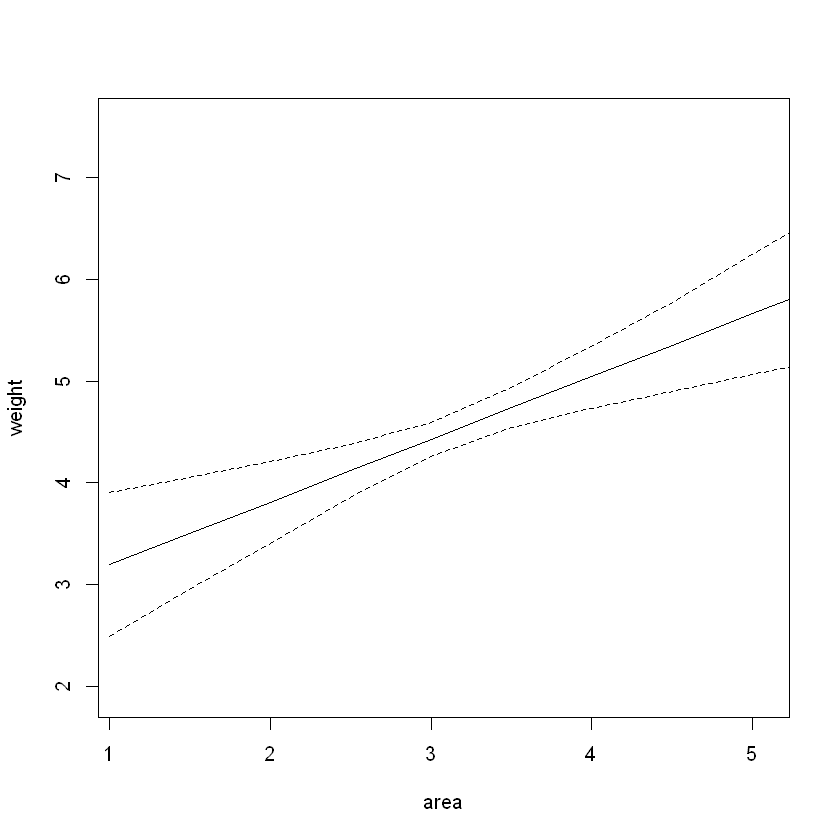

In [211]:
# Here is the code for plotting the effect of area, 
# holding groupsize constant at the mean:

area.seq <- seq(from=1,to=6,by=0.5) 
pred.dat <- data.frame( area=area.seq , groupsize=mean(d$groupsize) )
mu <- link( m5H2 , data=pred.dat )
mu.mean <- apply( mu , 2 , mean )
mu.ci <- apply( mu , 2 , PI )
plot( weight ~ area , data=d , type="n" )
lines( area.seq , mu.mean )
lines( area.seq , mu.ci[1,] , lty=2 )
lines( area.seq , mu.ci[2,] , lty=2 )

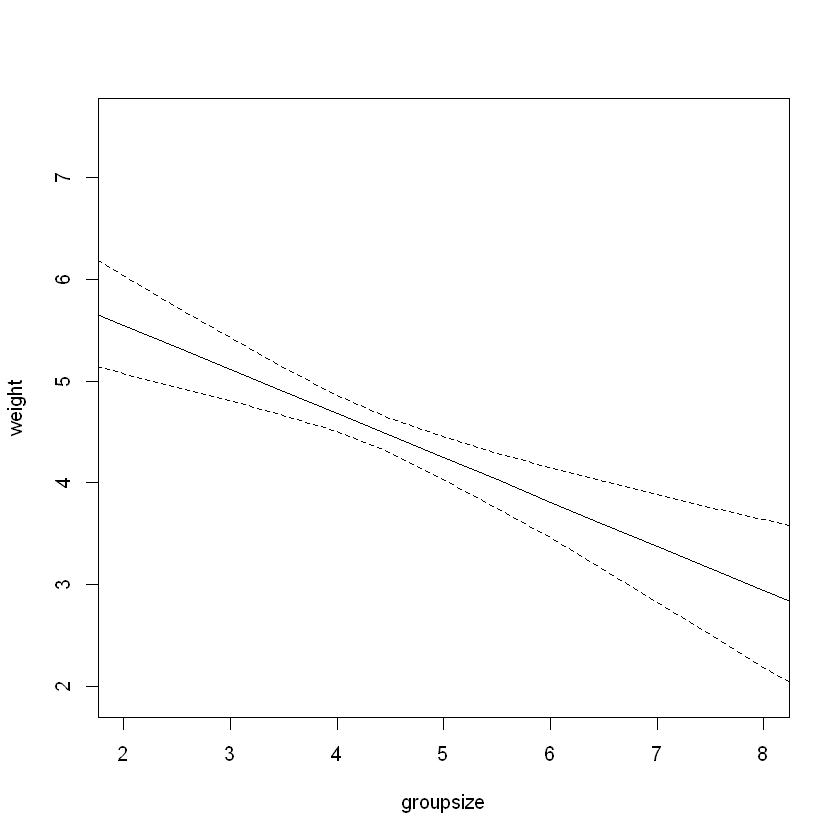

In [213]:
# And here is the code for the analogous plot for 
# groupsize, holding area constant at the mean:

gs.seq <- seq(from=1,to=9,by=0.5) 
pred.dat <- data.frame( area=mean(d$area) , groupsize=gs.seq )
mu <- link( m5H2 , data=pred.dat )
mu.mean <- apply( mu , 2 , mean )
mu.ci <- apply( mu , 2 , PI )
plot( weight ~ groupsize , data=d , type="n" )
# type ='n' hides points
lines( gs.seq , mu.mean )
lines( gs.seq , mu.ci[1,] , lty=2 )
lines( gs.seq , mu.ci[2,] , lty=2 )

* <font color = 'blue'>So from the smallest area territory to the largest, there is a change from 3kg to 6kg in expected weight</font>. That’s a lot. 

* <font color = 'blue'>For a change from the smallest groups (2 animals) to the largest (8 animals), we expect a change in body weight from about 6kg down to 3kg</font>. Again that’s a big effect, given that body weight only varies between 2kg and 7kg in the entire data.

> counterfactual plots shows you what the model would predict with hypothetical data that changes one parameter and keeps the others at their mean value.

Remember, I’ve blanked out the data points here, because <font color = 'red'>these are like experiments done with the model fit, to see how the predictions respond to changing one predictor, holding the other constant</font>. Since in the real data, the predictors are correlated, you can’t easily plot the predictions against the raw data.

<font color = 'red'>You get different results with the multivariate model, because the predictor variables area and groupsize are correlated with one another but have opposite correlations with the outcome</font>. 

* Area is positively correlated with weight: more area means more resources means heavier foxes. 
* Group size is negatively correlated with weight: bigger groups for a given territory size means less food per animal, means lighter foxes. 

But since in the natural fox groups, area and group size are correlated—more foxes go to the bigger territories, as you might expect from an ideal free perspective. You can see for yourself by plotting the two variables against one another:

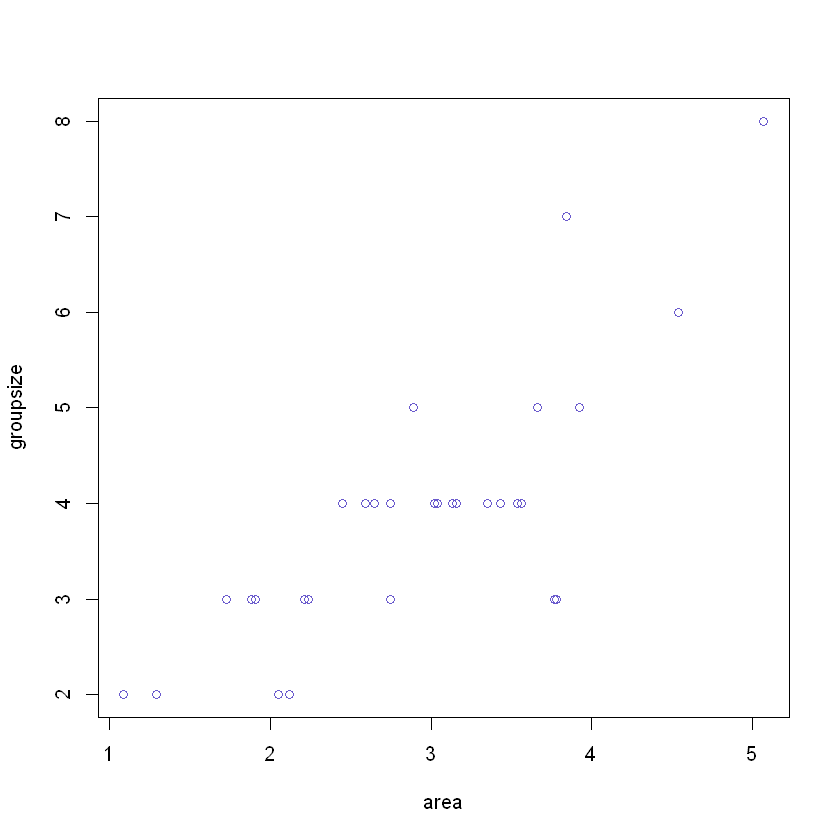

In [214]:
plot( groupsize ~ area , data=d , col="slateblue")

<font color = 'red'>But since area and groupsize are not perfectly correlated, the multiple regression can focus on those groups that are most informative about the countervailing effects of each predictor</font>. 

 * <font color = 'purple'>For example</font>, those groups that have few animals for their area (you can see some in the plot above) help us figure out whether reducing group size leads to heavier foxes or not. 
 
     The regression automatically compares such groups to groups with similar sized territories (similar area) but with higher densities of animals. If the animals in the smaller groups are heavier on average, that informs the estimate of the coefficient for groupsize.

It would of course be better to have a direct experiment. If you could experimentally alter group sizes, leaving territory sizes unchanged (might be hard, if more animals are needed to defend territory size!), then you could make stronger inferences about the direct causal effect of density on body weight.

##### **<font color = 'purple' style='background-color: lightyellow'>5H3. Finally, consider the avgfood variable. Fit two more multiple regressions: </font>**

(1) body weight as an additive function of avgfood and groupsize, and 

(2) body weight as an additive function of all three variables, avgfood and groupsize and area. 

Compare the results of these models to the previous models you’ve fit, in the first two exercises. 

(a) Is avgfood or area a better predictor of body weight? If you had to choose one or the other to include in a model, which would it be? Support your assessment with any tables or plots you choose. 

(b) When both avgfood or area are in the same model, their effects are reduced (closer to zero) and their standard errors are larger than when they are included in separate models. Can you explain this result?

###### PART 1

In [215]:
d %>% colnames()

[1] "group"     "avgfood"   "groupsize" "area"      "weight"

In [217]:
d$groupsize %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   4.345   5.000   8.000 

In [219]:
m5H3_1 <- quap(
    alist(
        weight ~ dnorm(mu , sigma) ,
        mu <- a + b_avgfood * avgfood + b_groupsize * groupsize ,
        a ~ dnorm(mean=0 , 100) ,
        b_avgfood ~ dnorm(mean=0 , 10) ,
        b_groupsize ~ dnorm(mean=0 , 10) ,
        sigma ~ dunif(min=0, max=50)
    ) , data = d )

m5H3_1 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
a,4.14,0.43,3.45,4.83
b_avgfood,3.77,1.20,1.85,5.70
b_groupsize,-0.56,0.16,-0.81,-0.31
sigma,1.12,0.07,1.00,1.23


The estimate for avgfood in m5H3_1 is pretty far from zero, and its 89% interval is reliably above zero too. So it seems avgfood is a good predictor, at least combined with groupsize. 

<font color = 'purple'>Is it more strongly related to body weight than area is?</font> Hard to tell from the coefficient, because the range of avgfood is different than the range of area. Again, a plot helps.

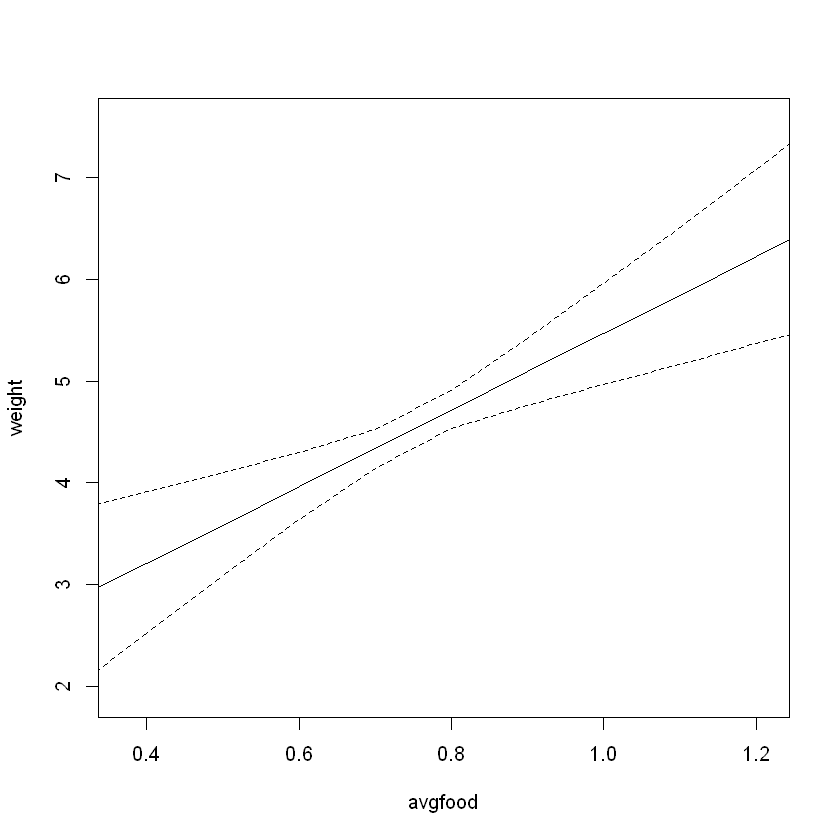

In [223]:
food.seq <- seq(from=0,to=1.5,by=0.1) 
pred.dat <- data.frame( avgfood=food.seq , groupsize=mean(d$groupsize) )
mu <- link( m5H3_1 , data=pred.dat )
mu.mean <- apply( mu , 2 , mean )
mu.ci <- apply( mu , 2 , PI )
plot( weight ~ avgfood , data=d , type="n" )
lines( food.seq , mu.mean )
lines( food.seq , mu.ci[1,] , lty=2 )
lines( food.seq , mu.ci[2,] , lty=2 )

I’ll show this new plot next to the analogous plot from before, the one produced for area:

<img src='pics/SR_k62.png' alt='Drawing' style='width:425pt'/>

The estimated effect of avgfood is a little stronger than area, but not by much. Especially on the high end (the right side of the plot), the expected body weight goes above 6kg for the extreme values of avgfood, whereas the plot for area never quite gets that high. This comparison suggests avgfood is a little better as a predictor. 

**<font color = 'purple' style='background-color: lightyellow'>A more principled way to compare the predictive value of the two variables (still consider only models that have one or the other, not both!) is to compare some measure of fit</font>**. Lots of people use $R_2$, which is appropriate for Gaussian models, at least most of the time. 

<font color = 'green'>**A measure that works for any likelihood-based model is negative log-likelihood**</font>. You can extract the log-likelihood of each model to compare them:

In [224]:
# -logLik(m3)
-logLik(m5H2)

# -logLik(m4)
-logLik(m5H3_1)

'log Lik.' 177.5824 (df=4)

'log Lik.' 177.3915 (df=4)

Smaller negative log-likelihood indicates a better fit. So model m4 fits better, by a small amount. This suggests avgfood is a better predictor, consistent with the intuition arrived at from inspecting the plots above. But in Chapter 6, you’ll see why fit measured this way can be misleading. In this case, it isn’t, but you’ll have to wait to verify that.

###### Part 2

In [222]:
m5H3_2 <- quap(
    alist(
        weight ~ dnorm(mu , sigma) ,
        mu <- a + b_avgfood * avgfood + b_groupsize * groupsize +
            b_area * area,
        a ~ dnorm(mean=0 , 100) ,
        b_avgfood ~ dnorm(mean=0 , 10) ,
        b_groupsize ~ dnorm(mean=0 , 10) ,
        b_area ~ dnorm(mean=0 , 10) ,
        sigma ~ dunif(min=0, max=50)
    ) , data = d )

m5H3_2 %>% precis() %>% round(2)

,mean,sd,5.5%,94.5%
a,4.07,0.43,3.39,4.76
b_avgfood,2.46,1.44,0.16,4.76
b_groupsize,-0.60,0.16,-0.85,-0.35
b_area,0.39,0.24,0.01,0.77
sigma,1.10,0.07,0.99,1.22


**<font color = 'purple' style='background-color: lightyellow'>Is neither avgfood nor area important?</font>** 

While they both still have positive MAP estimates, their intervals are now spread much more widely. This is a case of multicollinearity, although not an extreme one. Take a look at the scatter of avgfood against area (do this yourself). 

In [225]:
d %>% colnames

[1] "group"     "avgfood"   "groupsize" "area"      "weight"

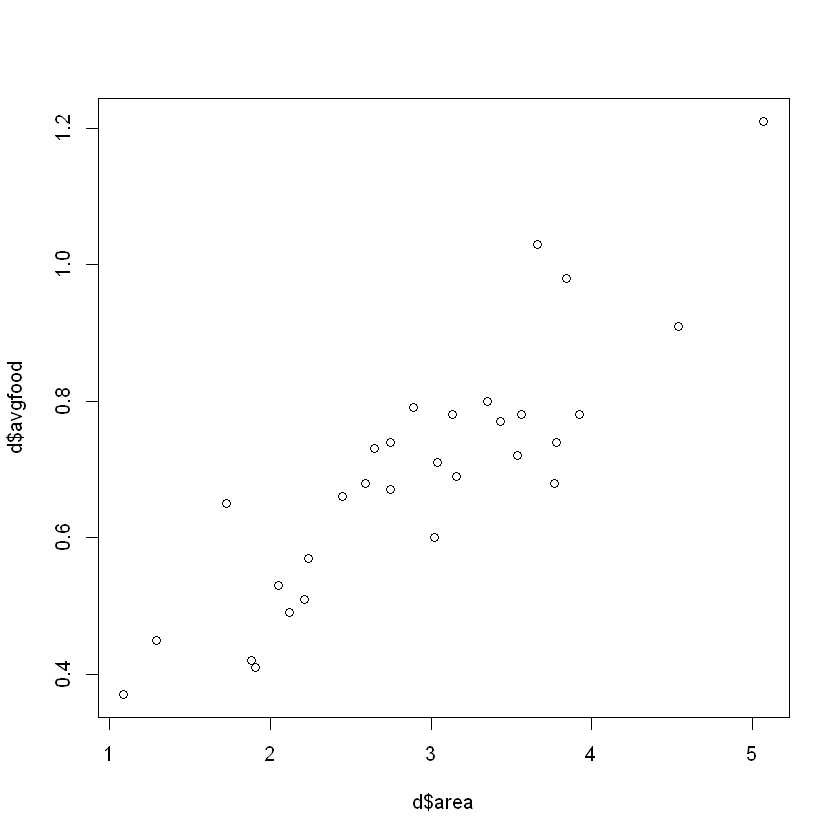

In [226]:
plot(d$avgfood ~ d$area)

Bigger territories have more food in them. That accounts for the high correlation here. That in turn accounts for why adding both variables results in inflated standard errors for both. Now why would avgfood be a slightly better predictor? Hard to know for sure, but it stands to reason that avgfood is the actual resource that affects body weight, and so it is a more reliable predictor.

If you think about it, area should only affect fox weight through food availability. To really test that speculation, we’d need some way to manipulate food availability in a habitat, keeping area the same Then we could break up that correlation a bit and make stronger causal inferences. 

But it might turn out that area does have some direct effect on fox weight, maybe because the larger territories are not really like the smaller ones. They could be in different places (on edges of towns, perhaps), and therefore introduce different factors, like different ecological communities and different disease risk.

# MISC

##### plot(null)

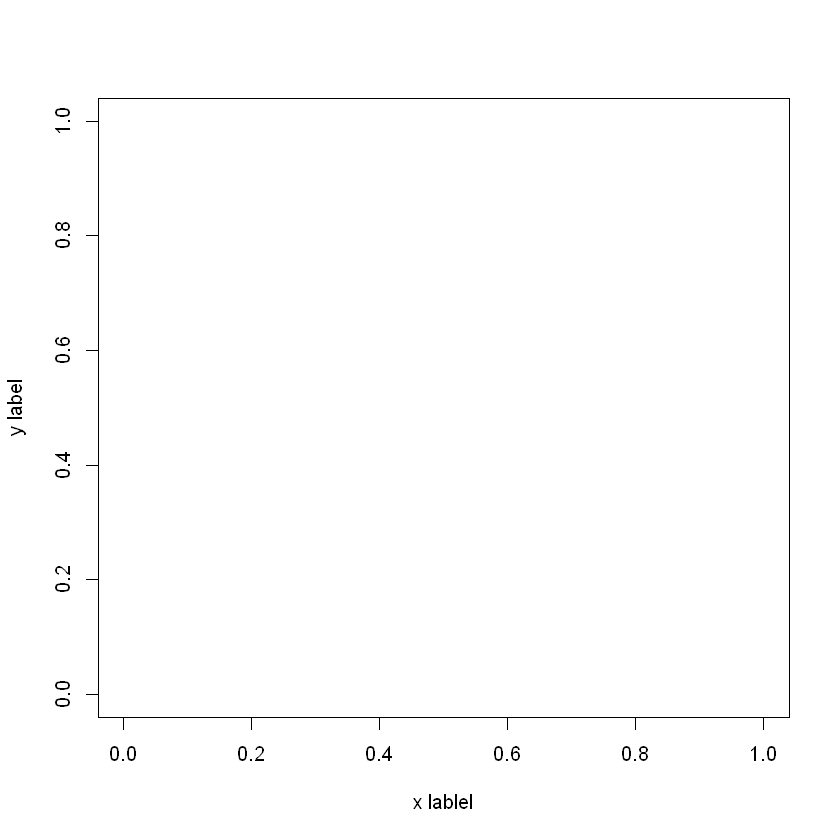

In [84]:
plot(NULL, xlim=c(0,1), ylim=c(0,1), ylab="y label", xlab="x lablel")

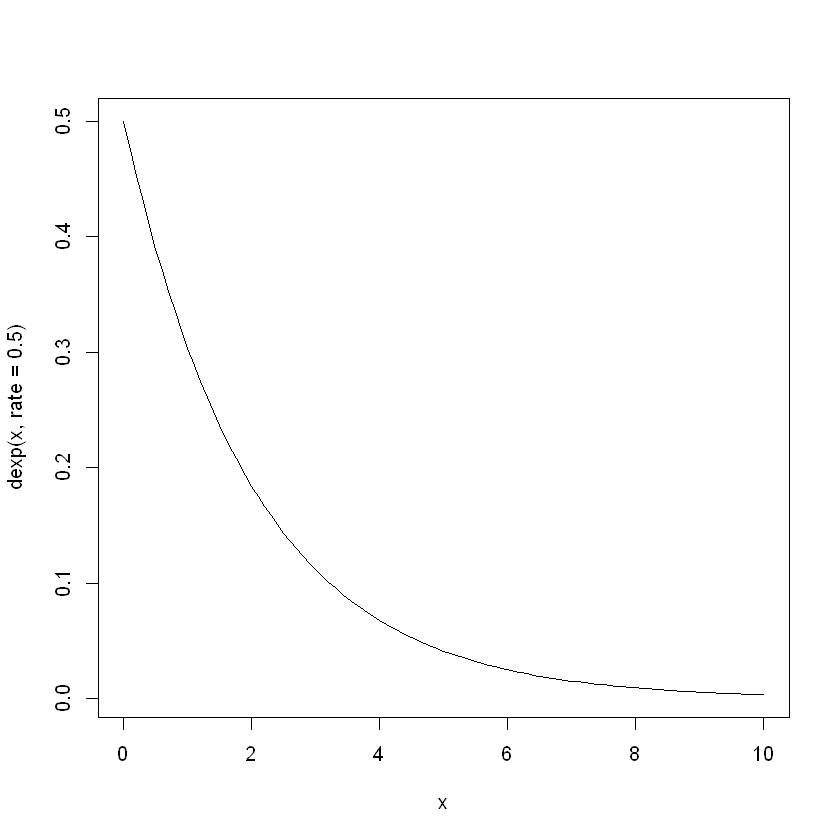

In [136]:
curve(dexp(x, rate = .5), from = 0, to = 10)

This is useful when you want to add lines or dots afterwards within a for loop or something similar. Just remember to change the xlim and ylim values based on the data you want to plot.

##### how sim works

simulate mu and sigma 

<img src='pics/SR_j31.png' alt='Drawing' style='width:425pt'/>

##### how link works

What link will do is take your map model fit, sample from the posterior distribution, and then compute µ for each case in the data and sample from the posterior distribution.

##### Exponential Distribution

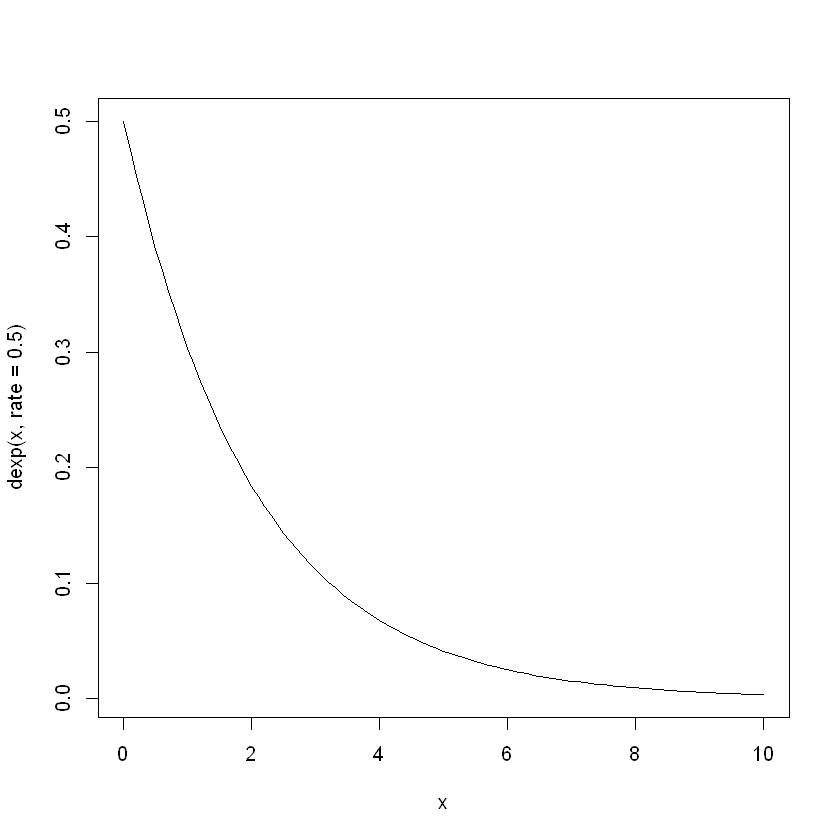

In [136]:
curve(dexp(x, rate = .5), from = 0, to = 10)

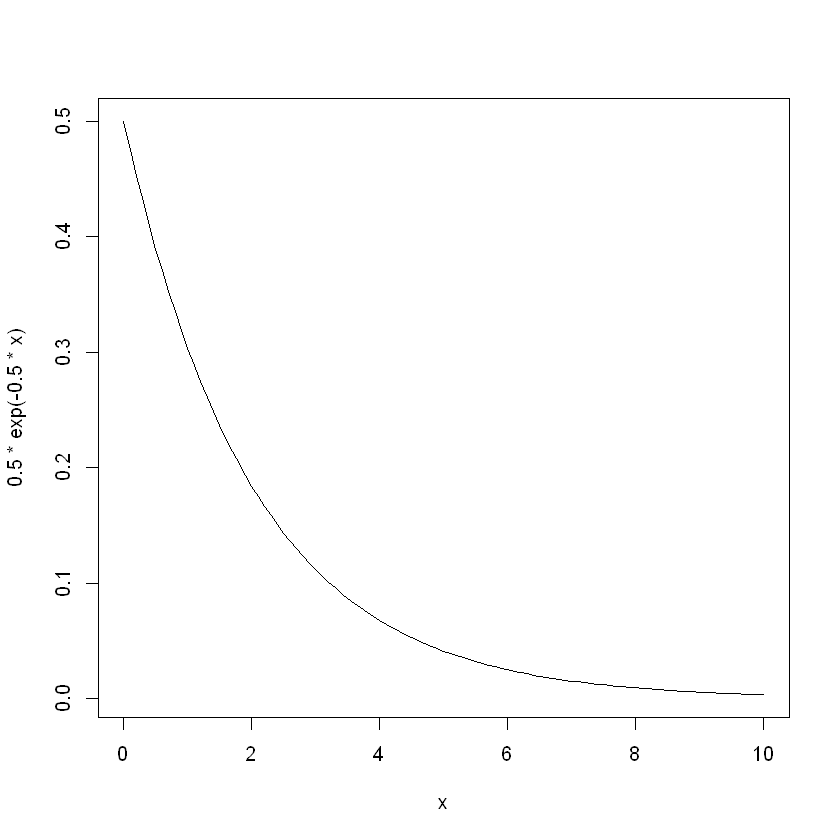

In [137]:
curve(0.5*exp(-0.5*x), from = 0, to = 10)

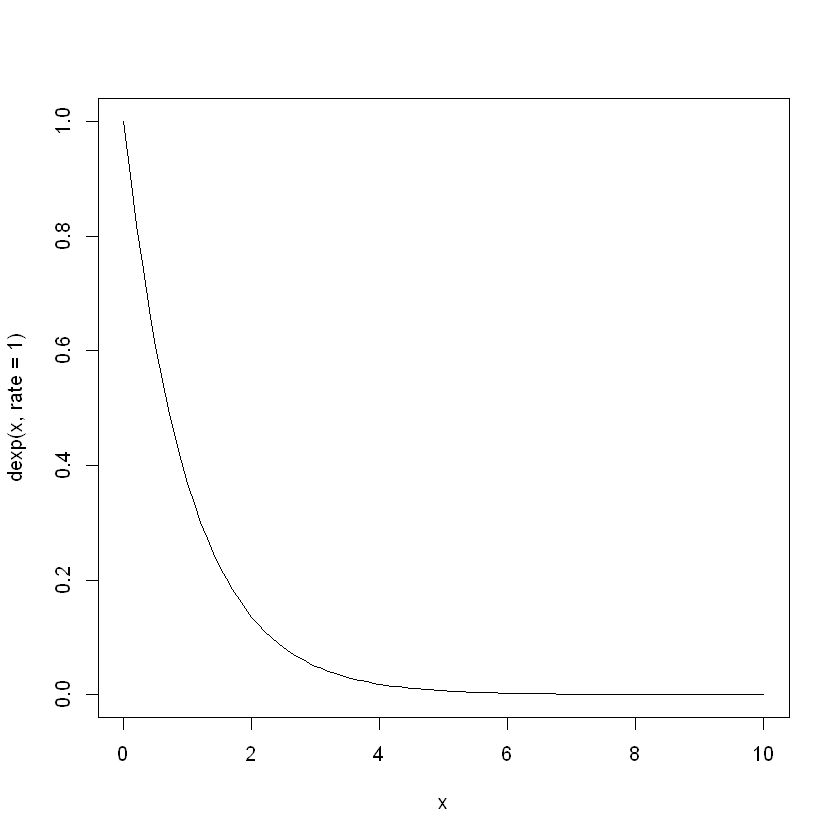

In [138]:
curve(dexp(x, rate = 1), from = 0, to = 10)

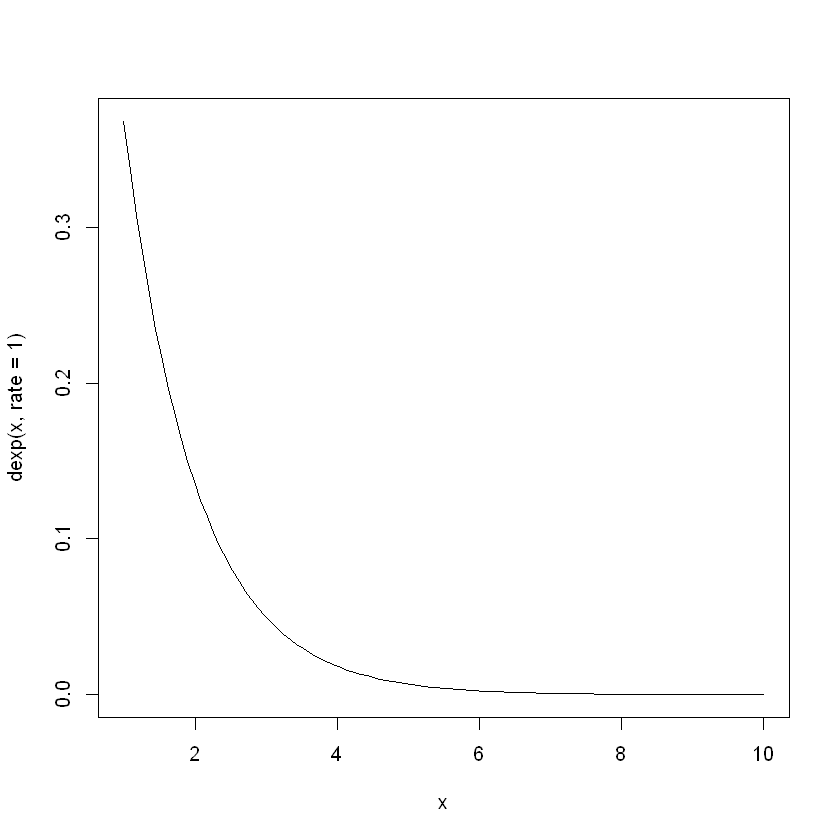

In [143]:
curve(dexp(x, rate = 1), from = 1, to = 10)

In [121]:
dexp(1)

[1] 0.3678794

* Always positive

* the value you put in there is setting the average value that you expect the standard deviation to be at.

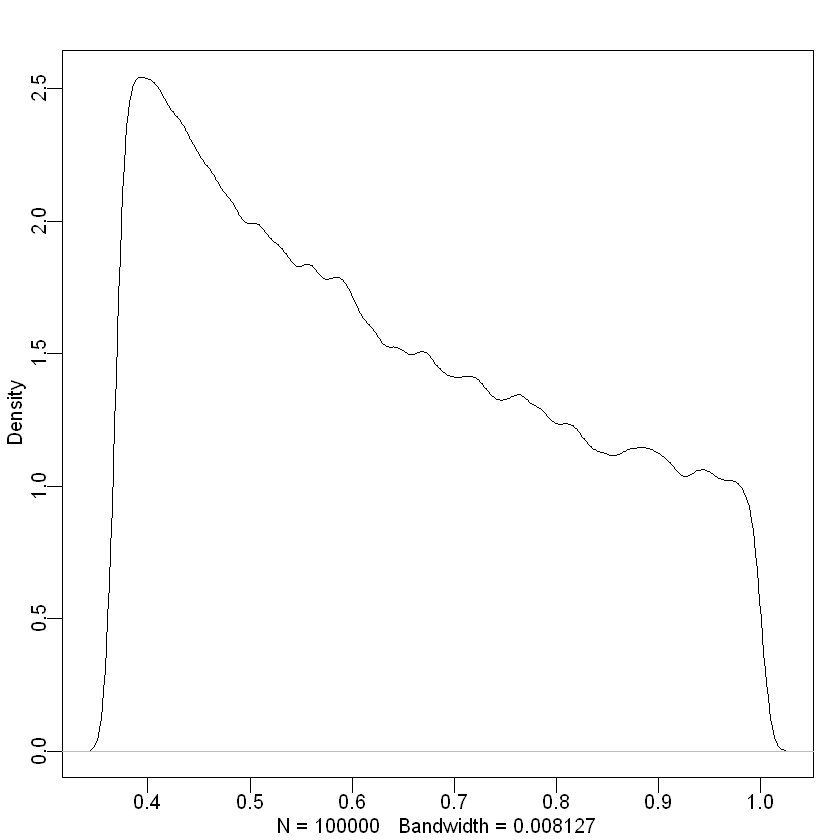

In [136]:
# exponential distribution
dens(dexp(runif(100000)))

## Maintaining multiple versions of same package

##### code

In [70]:
# .libPaths()[1] # .libPaths()[2] # .libPaths()[3]
# lapply(.libPaths(), dir) listing of pkgs in library
.libPaths()


[1] "C:/Users/bings/Documents/R/win-library/3.5"          
[2] "C:/Users/bings/Anaconda3/envs/R_flinks/lib/R/library"
[3] "C:/Users/bings/Documents/R/test-library"

In [71]:
# create .libPaths() location to new library folder
myPaths <- .libPaths()
myPaths <- c(myPaths, "C:/Users/bings/Documents/R/test-library")
.libPaths(myPaths)
myPaths

[1] "C:/Users/bings/Documents/R/win-library/3.5"          
[2] "C:/Users/bings/Anaconda3/envs/R_flinks/lib/R/library"
[3] "C:/Users/bings/Documents/R/test-library"             
[4] "C:/Users/bings/Documents/R/test-library"

In [ ]:
# install packages to new library
install.packages(c("coda","mvtnorm","devtools","loo"), 
                 lib = "C:/Users/bings/Documents/R/test-library")

# install experimental branch of statistical rethinking package
library(devtools)
devtools::install_github("rmcelreath/rethinking", 
                         ref="Experimental", 
                         lib = "C:/Users/bings/Documents/R/test-library")


In [1]:
# loads experimental branch of statistical rethinking
library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.
Loading required package: parallel
rethinking (Version 1.81)


##### testing

<img src='pics/SR_h37.png' alt='Drawing' style='width:425pt'/>

In [64]:
library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

In [54]:
detach("package:rethinking", unload=TRUE)

ERROR: Error in detach("package:rethinking", unload = TRUE): invalid 'name' argument


In [65]:
# load data
library(rethinking)

data(WaffleDivorce)
d <- WaffleDivorce

# standardize predictor
d$MedianAgeMarriage.s <- (d$MedianAgeMarriage-mean(d$MedianAgeMarriage))/
sd(d$MedianAgeMarriage)

# fit model
m5.1 <- map(
    alist(
        Divorce ~ dnorm( mu , sigma ) ,
        mu <- a + bA * MedianAgeMarriage.s ,
        a ~ dnorm( 10 , 10 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) , data = d )

In [60]:
library(rethinking)

## R code 5.1
# load data and copy
# library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )

## R code 5.2
sd( d$MedianAgeMarriage )

## R code 5.3
m5.1 <- quap(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bA * A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = d )

## R code 5.4
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

In [34]:
library("switchr")

Warning message:
"package 'switchr' was built under R version 3.5.2"
Attaching package: 'switchr'

The following object is masked from 'package:dplyr':

    location

